# Import Packages

In [1]:
#################################################################################### 
# Pandas, Numpy and SQL Connection
# import pyodbc
import pandas as pd
# import missingno as msno
import warnings
import numpy as np
import os, re, os.path
import time
from datetime import datetime, date
from numpy import array
# import dalex as dx
from itertools import product
import json
# from sqlalchemy import create_engine

####################################################################################
# Sklearn ML Packages
# import sklearn
# from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans

# # Resampling
# from sklearn.utils import resample
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler
# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import SMOTENC #https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html#imblearn.over_sampling.SMOTENC
# from imblearn.combine import SMOTEENN
# from imblearn.combine import SMOTETomek

# # Pipeline
# from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion # Pipeline, Gridsearch, train_test_split
# from imblearn.pipeline import Pipeline as imbPipeline
# from sklearn.impute import SimpleImputer
# from sklearn.compose import ColumnTransformer
# from sklearn.model_selection import train_test_split, GridSearchCV # splitting the data
# from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_val_score, cross_validate
# from sklearn.model_selection import GroupKFold
# from sklearn import set_config

# # Model Metrics Evaluation
# from sklearn import metrics
# #from sklearn.metrics import jaccard_similarity_score as jss # evaluation metric
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.metrics import precision_score # evaluation metric
# #from sklearn.metrics import plot_confusion_matrix
# from sklearn.metrics import confusion_matrix, classification_report # evaluation metric
# from sklearn.metrics import confusion_matrix # evaluation metric
# from sklearn.metrics import log_loss # evaluation metric
# from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, make_scorer
# from sklearn.metrics import roc_curve
# from sklearn.metrics import mean_squared_error

# # tools for scaling: use paranthesis to break a long import statement
# from sklearn.preprocessing import (
# OneHotEncoder, LabelEncoder, LabelBinarizer, Binarizer, OrdinalEncoder, 
# StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler)# data normalization

# # Classification Models
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.feature_selection import VarianceThreshold
# from mlxtend.feature_selection import ExhaustiveFeatureSelector
# from sklearn.feature_selection import RFE
# from sklearn.feature_selection import RFECV
# from sklearn.feature_selection import SelectFromModel
# from sklearn.feature_extraction import DictVectorizer
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.linear_model import LogisticRegression # model algorithm
# from sklearn.naive_bayes import BernoulliNB
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
# from sklearn import svm
# from sklearn.svm import SVC
# from sklearn.neural_network import MLPClassifier
# import xgboost as xgb
# from xgboost import XGBClassifier

####################################################################################

# Hypothesis Testing
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
import scipy.stats as stats
# from statsmodels.stats.proportion import proportions_ztest, proportion_confint
# import statsmodels.api as sm
from scipy.stats import ttest_ind
from scipy.stats import norm
#import statsmodels.stats.api as sms
from math import ceil
import glob

####################################################################################
# Visualization
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# import squarify

####################################################################################
# Configuration
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 400)

from matplotlib import rcParams
sns.set(context='notebook', style='whitegrid', rc={'figure.figsize': (18,4)})
rcParams['figure.figsize'] = 18,4

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)


# ####################################################################################
# # Model Serialization

# import pickle 
# import joblib
# from joblib import dump, load
# import cloudpickle

####################################################################################
#class that mutes code output
#source: https://stackoverflow.com/questions/2828953/silence-the-stdout-of-a-function-in-python-without-trashing-sys-stdout-and-resto
import sys, traceback
class Suppressor(object):
    def __enter__(self):
        self.stdout = sys.stdout
        sys.stdout = self
    def __exit__(self, type, value, traceback):
        sys.stdout = self.stdout
        if type is not None:
    # Do normal exception handling
            def write(self, x): pass

In [2]:
os.getcwd()

'c:\\Users\\Jenny Huang\\Desktop'

# Email Campaign Analytics Overview

Some questions to consider as you evaluate the campaign:

• Which e-mail format performed the best, the Men’s E-mail or the Women’s E-mail? Did the two formats
perform differently when measured across different metrics?

• What incremental sales did each e-mail format deliver? Did the Men’s E-mail perform differently than the
Women’s E-mail across various customer segments?

• Given the results, to which audience would you target the Men’s E-mail and the Women’s E-mail? If you
could only send an e-mail campaign to 10,000 customers, who would receive which e-mail? Why?

# Assumptions & Goals

* Assume there's no other marketing initiatives going on at the same time, confound variable, introducing threats to valid reasoning 
* The campaign have run enought time
* We currently don't have a baseline conversion (historic conversion rate) to compare against
* Are we aiming to increase visits? increase conversion? increase spend? 


# Analysis Steps & Methodologies

* 1. Executive Summary 
* 2. Overall high level performance across Segments (Performance Metrics)
* 2. Segments performance across different dimensions (Sales, Channel, zip_code)
* 3. Conduct Statistical Analysis and make sure the results are signicant 
* 4. Leads Targeting (to which audience would you target the Men’s E-mail and the Women’s E-mail? If you could only send an e-mail campaign to 10,000 customers, who would receive which e-mail? Why?)
* 5. Intersting Insights
* 5. Recommendation on the next steps, analysis/implications/ Further Analysis (what other attributes)
* 6. Appendix

* Do conversion/visit/spend seems higher when the segment is targeted to opposite sex? or It makes no difference? 
* Where to target? rural/urban? is there an analysis we can compare
* 


# Read Data

In [105]:
df = pd.read_csv('.\E-MailAnalytics_CaseData.csv')
df.head(20)
df.shape
df.info()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0
5,6,2) $100 - $200,134.83,0,1,Surburban,0,Phone,Womens E-Mail,1,0,0.0
6,9,3) $200 - $350,280.20,1,0,Surburban,1,Phone,Womens E-Mail,0,0,0.0
7,9,1) $0 - $100,46.42,0,1,Urban,0,Phone,Womens E-Mail,0,0,0.0
8,9,5) $500 - $750,675.07,1,1,Rural,1,Phone,Mens E-Mail,0,0,0.0
9,10,1) $0 - $100,32.84,0,1,Urban,1,Web,Womens E-Mail,0,0,0.0


(64000, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64000 entries, 0 to 63999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          64000 non-null  int64  
 1   history_segment  64000 non-null  object 
 2   history          64000 non-null  float64
 3   mens             64000 non-null  int64  
 4   womens           64000 non-null  int64  
 5   zip_code         64000 non-null  object 
 6   newbie           64000 non-null  int64  
 7   channel          64000 non-null  object 
 8   segment          64000 non-null  object 
 9   visit            64000 non-null  int64  
 10  conversion       64000 non-null  int64  
 11  spend            64000 non-null  float64
dtypes: float64(2), int64(6), object(4)
memory usage: 4.9+ MB


segment
Womens E-Mail    21387
Mens E-Mail      21307
No E-Mail        21306
Name: count, dtype: int64

segment
Mens E-Mail      5.773642
No E-Mail        5.749695
Womens E-Mail    5.767850
Name: recency, dtype: float64

segment
Mens E-Mail      242.835931
No E-Mail        240.882653
Womens E-Mail    242.536633
Name: history, dtype: float64

segment
Mens E-Mail      5174105.18
No E-Mail        5132245.81
Womens E-Mail    5187130.98
Name: history, dtype: float64

segment
Mens E-Mail      113.526929
No E-Mail        114.002705
Womens E-Mail    121.894762
Name: spend, dtype: float64

segment
Mens E-Mail      66.980
No E-Mail        88.365
Womens E-Mail    94.710
Name: spend, dtype: float64

segment
Mens E-Mail      30311.69
No E-Mail        13908.33
Womens E-Mail    23038.11
Name: spend, dtype: float64

segment
Mens E-Mail      267
No E-Mail        122
Womens E-Mail    189
Name: conversion, dtype: int64

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='segment', ylabel='spend'>

Text(0.5, 1.0, 'Spend Distribution by Segment')

Text(0.5, 0, 'Segment')

Text(0, 0.5, 'Spend ($)')

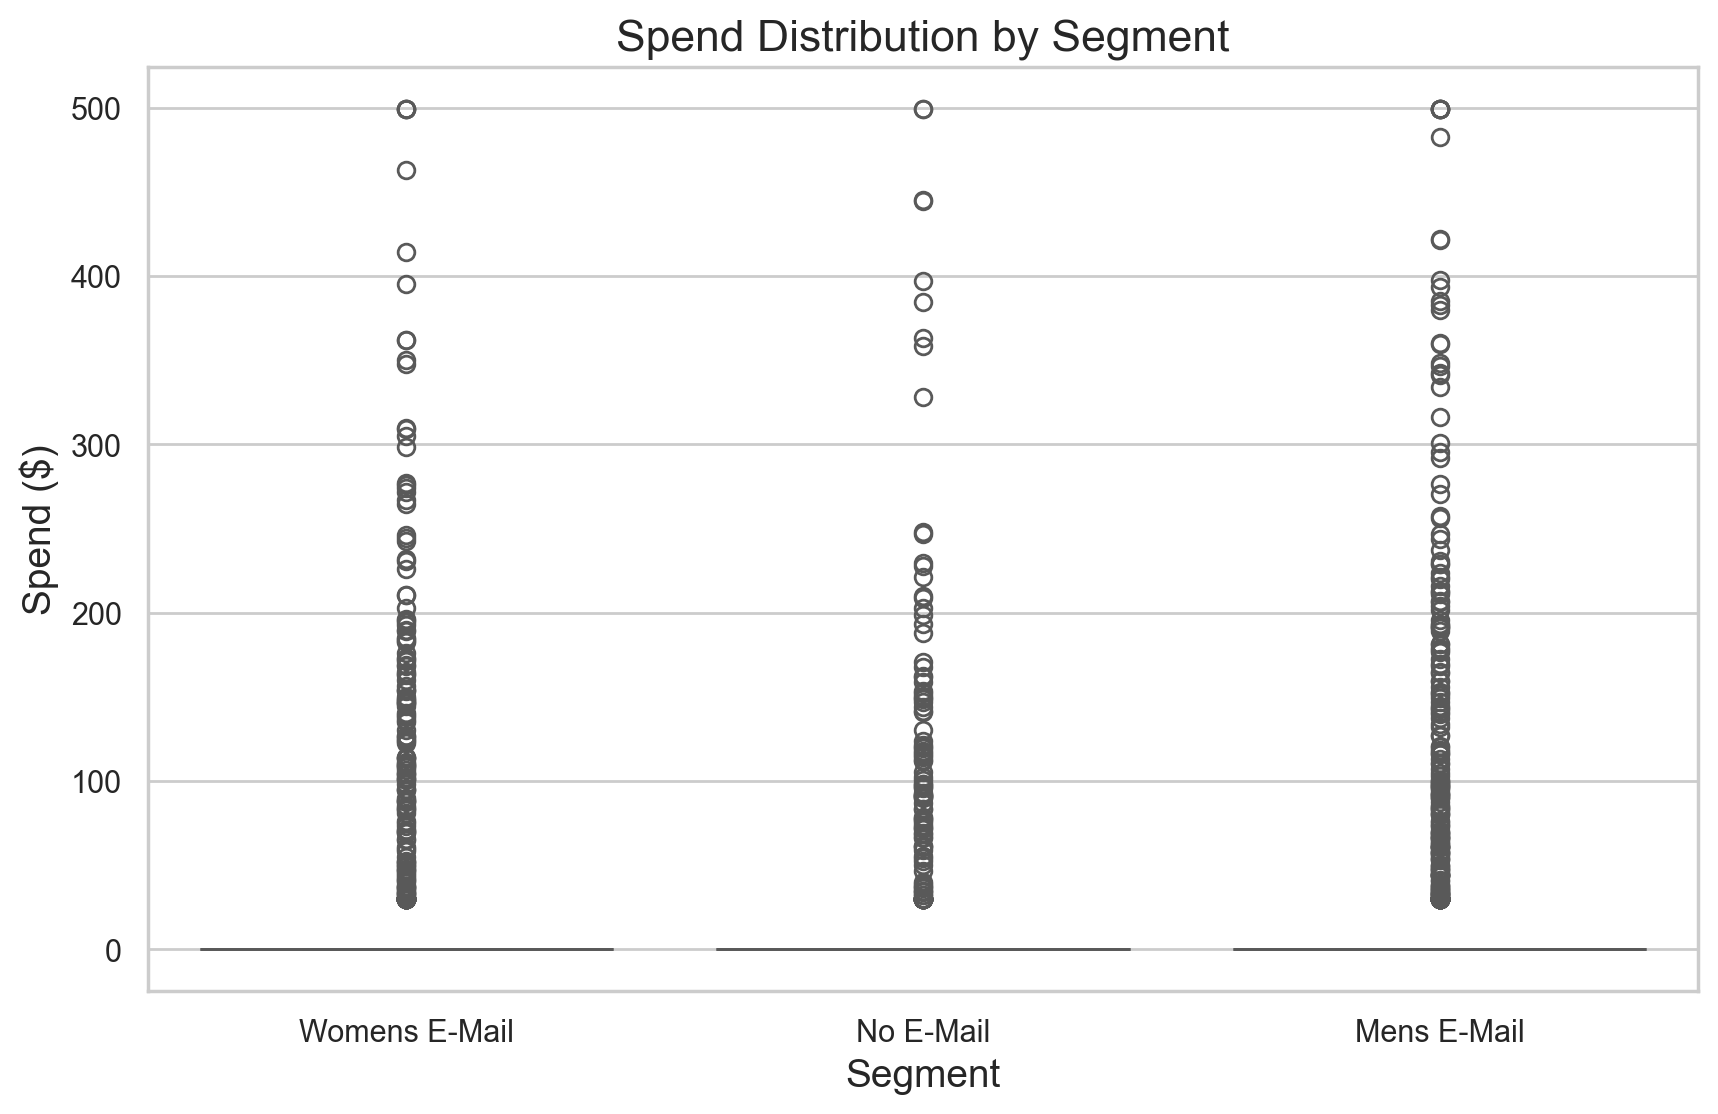

In [249]:
# df.loc[(df['conversion'] == 1)].groupby('segment').spend.mean()
# df.loc[(df['conversion'] == 0)].groupby('segment').spend.mean()

df.segment.value_counts()
df.groupby('segment').recency.mean()

df.groupby('segment').history.mean()
df.groupby('segment').history.sum()

df.loc[df['conversion']==1].groupby('segment').spend.mean() #average spend per conversion for each segment.
df.loc[df['conversion']==1].groupby('segment').spend.median()
df.loc[df['conversion']==1].groupby('segment').spend.sum()
df.loc[df['conversion']==1].groupby('segment').conversion.sum()


plt.figure(figsize=(10, 6)) 
sns.boxplot(x='segment', y='spend', data=df, palette='Set2') 
plt.title('Spend Distribution by Segment', fontsize=16)
plt.xlabel('Segment', fontsize=14) 
plt.ylabel('Spend ($)', fontsize=14)

In [116]:
df.groupby('segment')['history'].mean()
df.groupby('segment')['recency'].mean()

df[['segment', 'zip_code']].value_counts().unstack()

segment
Mens E-Mail      242.835931
No E-Mail        240.882653
Womens E-Mail    242.536633
Name: history, dtype: float64

segment
Mens E-Mail      5.773642
No E-Mail        5.749695
Womens E-Mail    5.767850
Name: recency, dtype: float64

zip_code,Rural,Surburban,Urban
segment,,,
Mens E-Mail,3243,9501,8563
No E-Mail,3139,9625,8542
Womens E-Mail,3181,9650,8556


In [183]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,64000.0,5.763734,3.507592,1.00,2.00,6.00,9.0000,12.00
history,64000.0,242.085656,256.158608,29.99,64.66,158.11,325.6575,3345.93
mens,64000.0,0.551031,0.497393,0.00,0.00,1.00,1.0000,1.00
womens,64000.0,0.549719,0.497526,0.00,0.00,1.00,1.0000,1.00
newbie,64000.0,0.502250,0.499999,0.00,0.00,1.00,1.0000,1.00
visit,64000.0,0.146781,0.353890,0.00,0.00,0.00,0.0000,1.00
conversion,64000.0,0.009031,0.094604,0.00,0.00,0.00,0.0000,1.00
spend,64000.0,1.050908,15.036448,0.00,0.00,0.00,0.0000,499.00


# Feature Engineeering

## when customers purchase both merchandise, assiociated with higher order values

In [240]:
# df['history'].loc[(df['mens'] == 1) & (df['womens'] == 1)].mean()
# df['history'].loc[(df['mens'] == 1) & (df['womens'] == 0)].mean()
# df['history'].loc[(df['mens'] == 0) & (df['womens'] == 1)].mean()


In [106]:
# df['Purchase_Ind'] = np.where(
#     (df['mens'] == 1) & (df['womens'] == 0), 1,
#     np.where(
#         (df['mens'] == 0) & (df['womens'] == 1), 1,
#         np.where(
#             (df['mens'] == 1) & (df['womens'] == 1), 2,
#             0 )))


In [104]:
# df['history_segment_ind'] = np.where(
#     df['history_segment'] == '1) $0 - $100', 1,
#     np.where(
#         df['history_segment'] == '2) $100 - $200', 2,
#         np.where(
#             df['history_segment'] == '3) $200 - $350', 3,
#             np.where(
#                 df['history_segment'] == '4) $350 - $500', 4,
#                 np.where(
#                     df['history_segment'] == '5) $500 - $750', 5,
#                     np.where(
#                         df['history_segment'] == '6) $750 - $1,000', 6,
#                         np.where(
#                             df['history_segment'] == '7) $1,000 +', 7,
#                             0
#                         )
#                     )
#                 )
#             )
#         )
#     )
# )


# Variable Distribution 

In [9]:
df['zip_code'].value_counts()

zip_code
Surburban    28776
Urban        25661
Rural         9563
Name: count, dtype: int64

In [10]:
# def var_dist_eda_plot(df):
#     for col in df.columns:
#         if df[col].dtypes == 'int64':
#             print(col)
#             sns.histplot(x=col, data=df)
#             plt.show()

#         elif df[col].dtypes == 'object':
#             print(col)
#             df[col].value_counts()
#             sns.countplot(x=col, data=df,  order = df[col].value_counts().index)
#             plt.show()
        
#         elif df[col].dtypes == 'float64':
#             print(col)
#             sns.boxplot(x=col, data=df)
#             plt.show()
#         else:
#             print('errors')

In [11]:
# var_dist_eda_plot(df)

# Visit 

In [12]:
df.groupby('segment')['visit'].value_counts().unstack()

visit,0,1
segment,,
Mens E-Mail,17413,3894
No E-Mail,19044,2262
Womens E-Mail,18149,3238


In [13]:
df.groupby('segment')['visit'].mean()

segment
Mens E-Mail      0.182757
No E-Mail        0.106167
Womens E-Mail    0.151400
Name: visit, dtype: float64

<Axes: xlabel='segment'>

Text(0.5, 1.0, 'Average Visits per Segment')

Text(0.5, 0, 'Segment')

Text(0, 0.5, 'Average Visits')

(array([0, 1, 2]),
 [Text(0, 0, 'Mens E-Mail'),
  Text(1, 0, 'No E-Mail'),
  Text(2, 0, 'Womens E-Mail')])

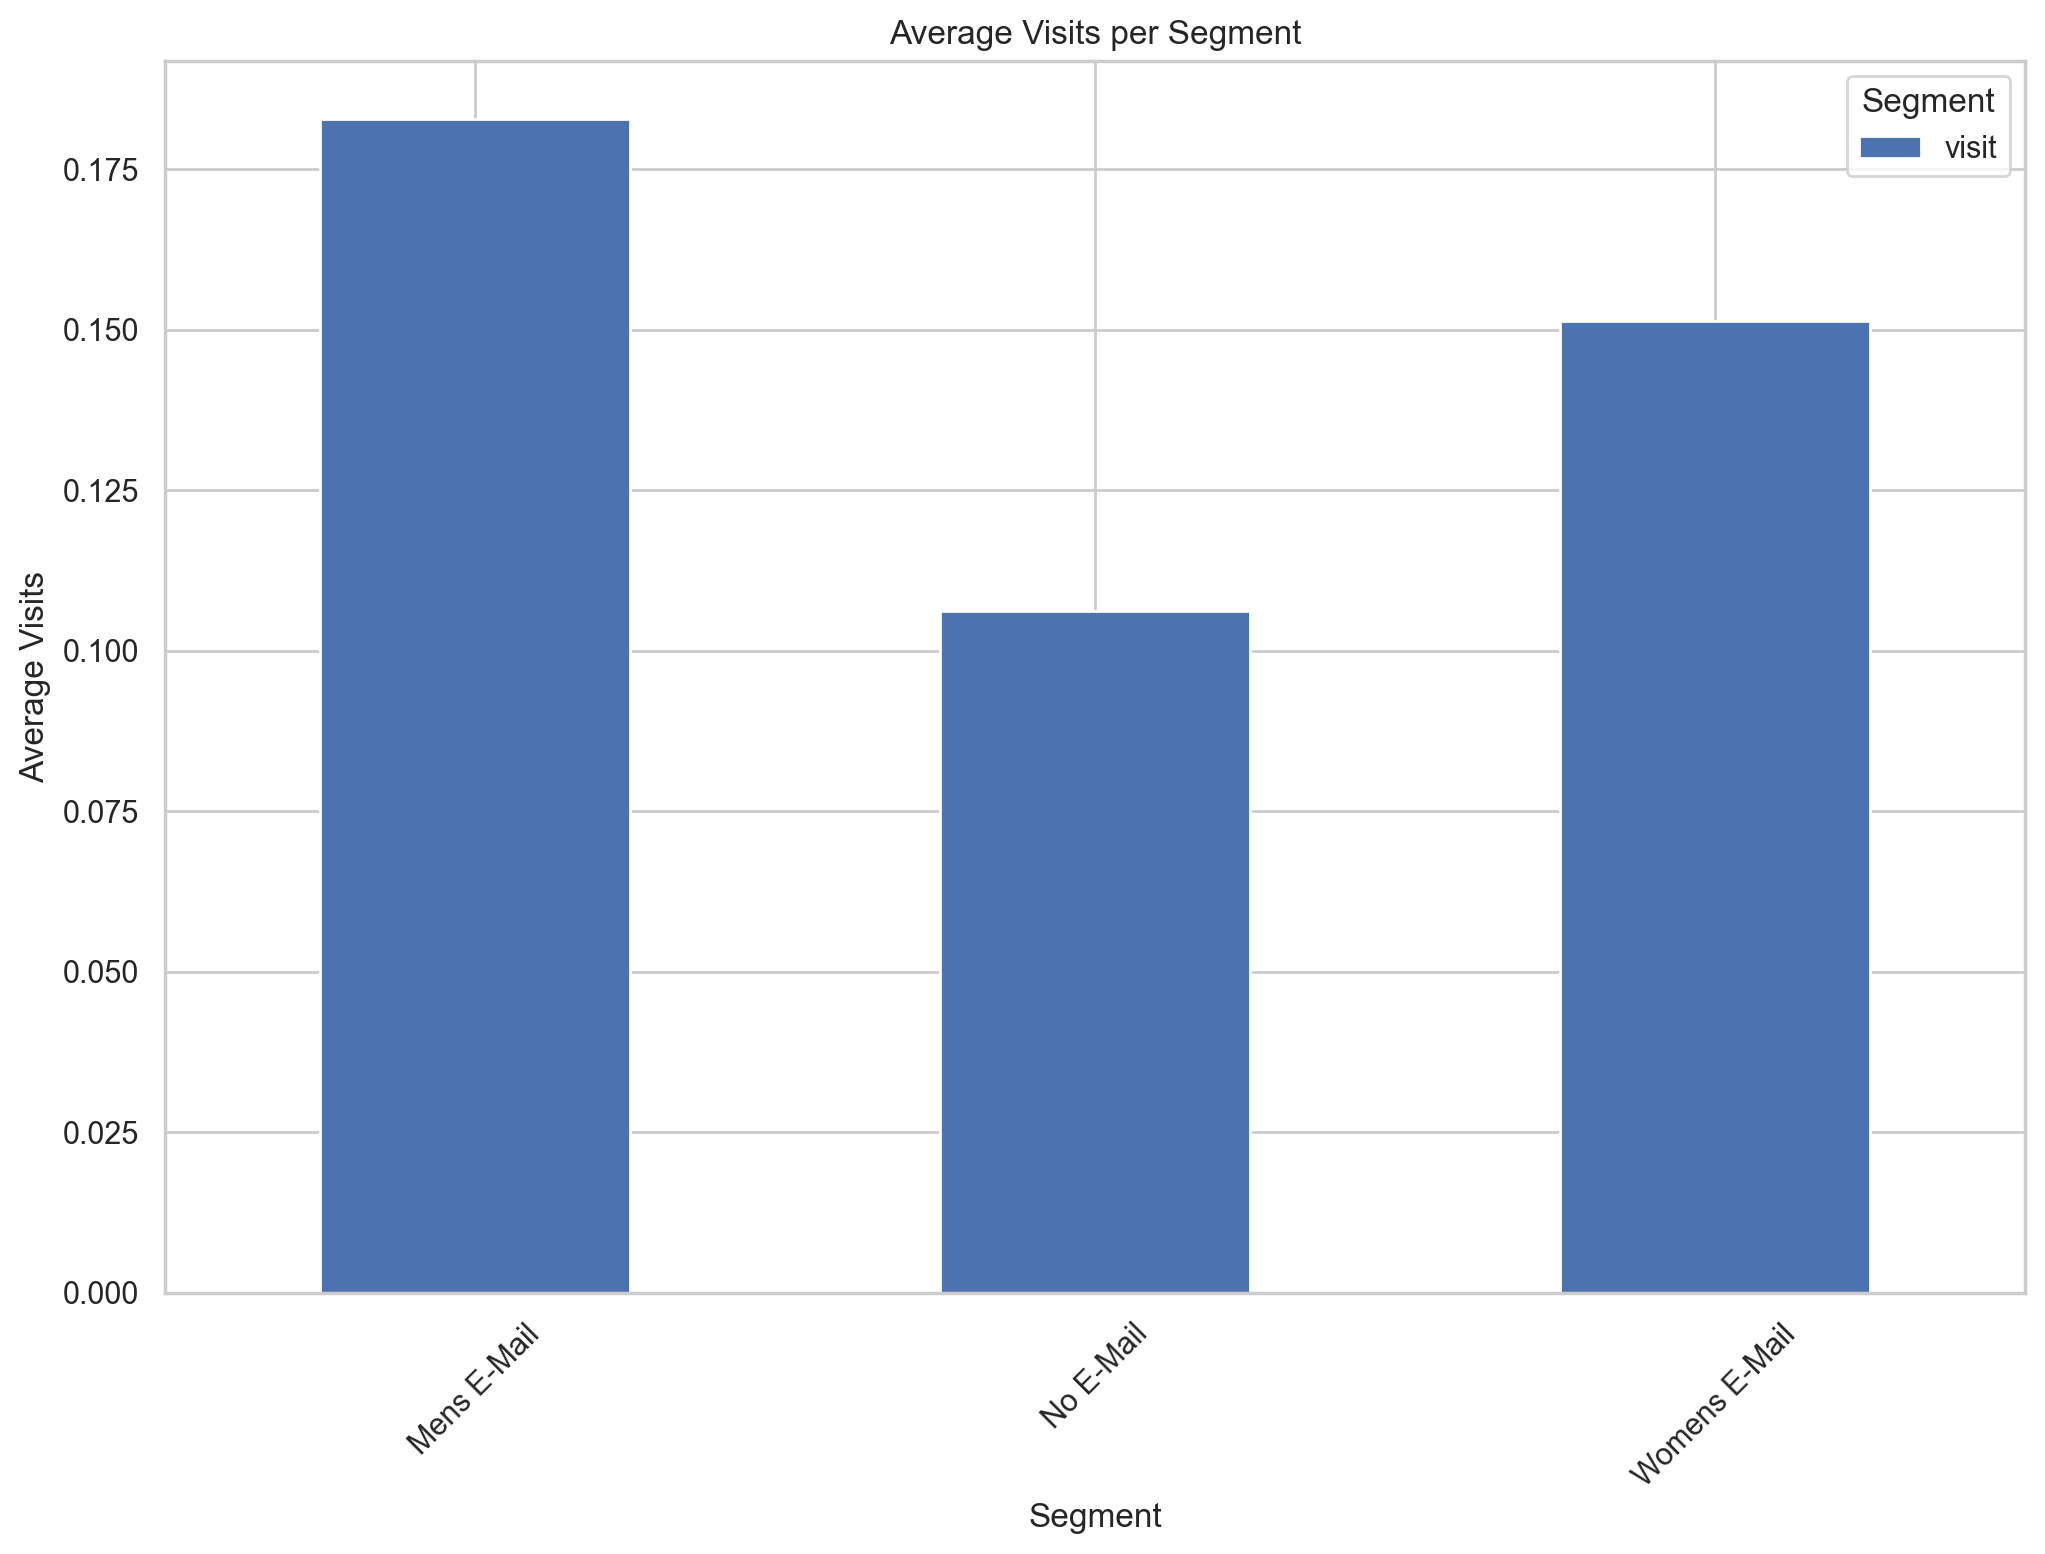

In [14]:
df.groupby('segment')['visit'].mean().plot(kind='bar', figsize=(12, 8)) 
plt.title('Average Visits per Segment') 
plt.xlabel('Segment') 
plt.ylabel('Average Visits') 
plt.legend(title='Segment') 
plt.xticks(rotation=45)
plt.show()

In [ ]:
def plot_segment_performance(df, second_dimension, metric):
    # Calculate the mean or median visits per segment and the second dimension
    if metric == 'spend':
        avg_visits = df.groupby([second_dimension, 'segment'])[metric].median().unstack()
    else:
        avg_visits = df.groupby([second_dimension, 'segment'])[metric].mean().unstack()
    
    print(avg_visits)
    row_cnts = df.groupby([second_dimension, 'segment'])[metric].count().unstack()
    print(row_cnts)

    segment_order = ['Mens E-Mail', 'Womens E-Mail', 'No E-Mail']
    avg_visits = avg_visits[segment_order]

    cmap = cm.Blues
    n_categories = len(avg_visits.columns)
    colors = [cmap(0.4 + 0.7 * (i / (n_categories - 1))) for i in range(n_categories)]

    # Plotting
    avg_visits.plot(kind='bar', figsize=(12, 8), color=colors)
    plt.title(f'{metric.capitalize()} across Segment and {second_dimension.capitalize()}')
    plt.xlabel(second_dimension.capitalize())
    plt.ylabel(f'{"Median" if metric == "spend" else "Mean"} {metric.capitalize()}')
    plt.legend(title='Segment')
    plt.xticks(rotation=45)
    plt.show()


## Visits & Channel 

segment       Mens E-Mail  No E-Mail  Womens E-Mail
channel                                            
Multichannel     0.211486   0.128550       0.175649
Phone            0.162771   0.087166       0.131796
Web              0.194415   0.118852       0.164529
segment       Mens E-Mail  No E-Mail  Womens E-Mail
channel                                            
Multichannel         2577       2606           2579
Phone                9240       9327           9454
Web                  9490       9373           9354


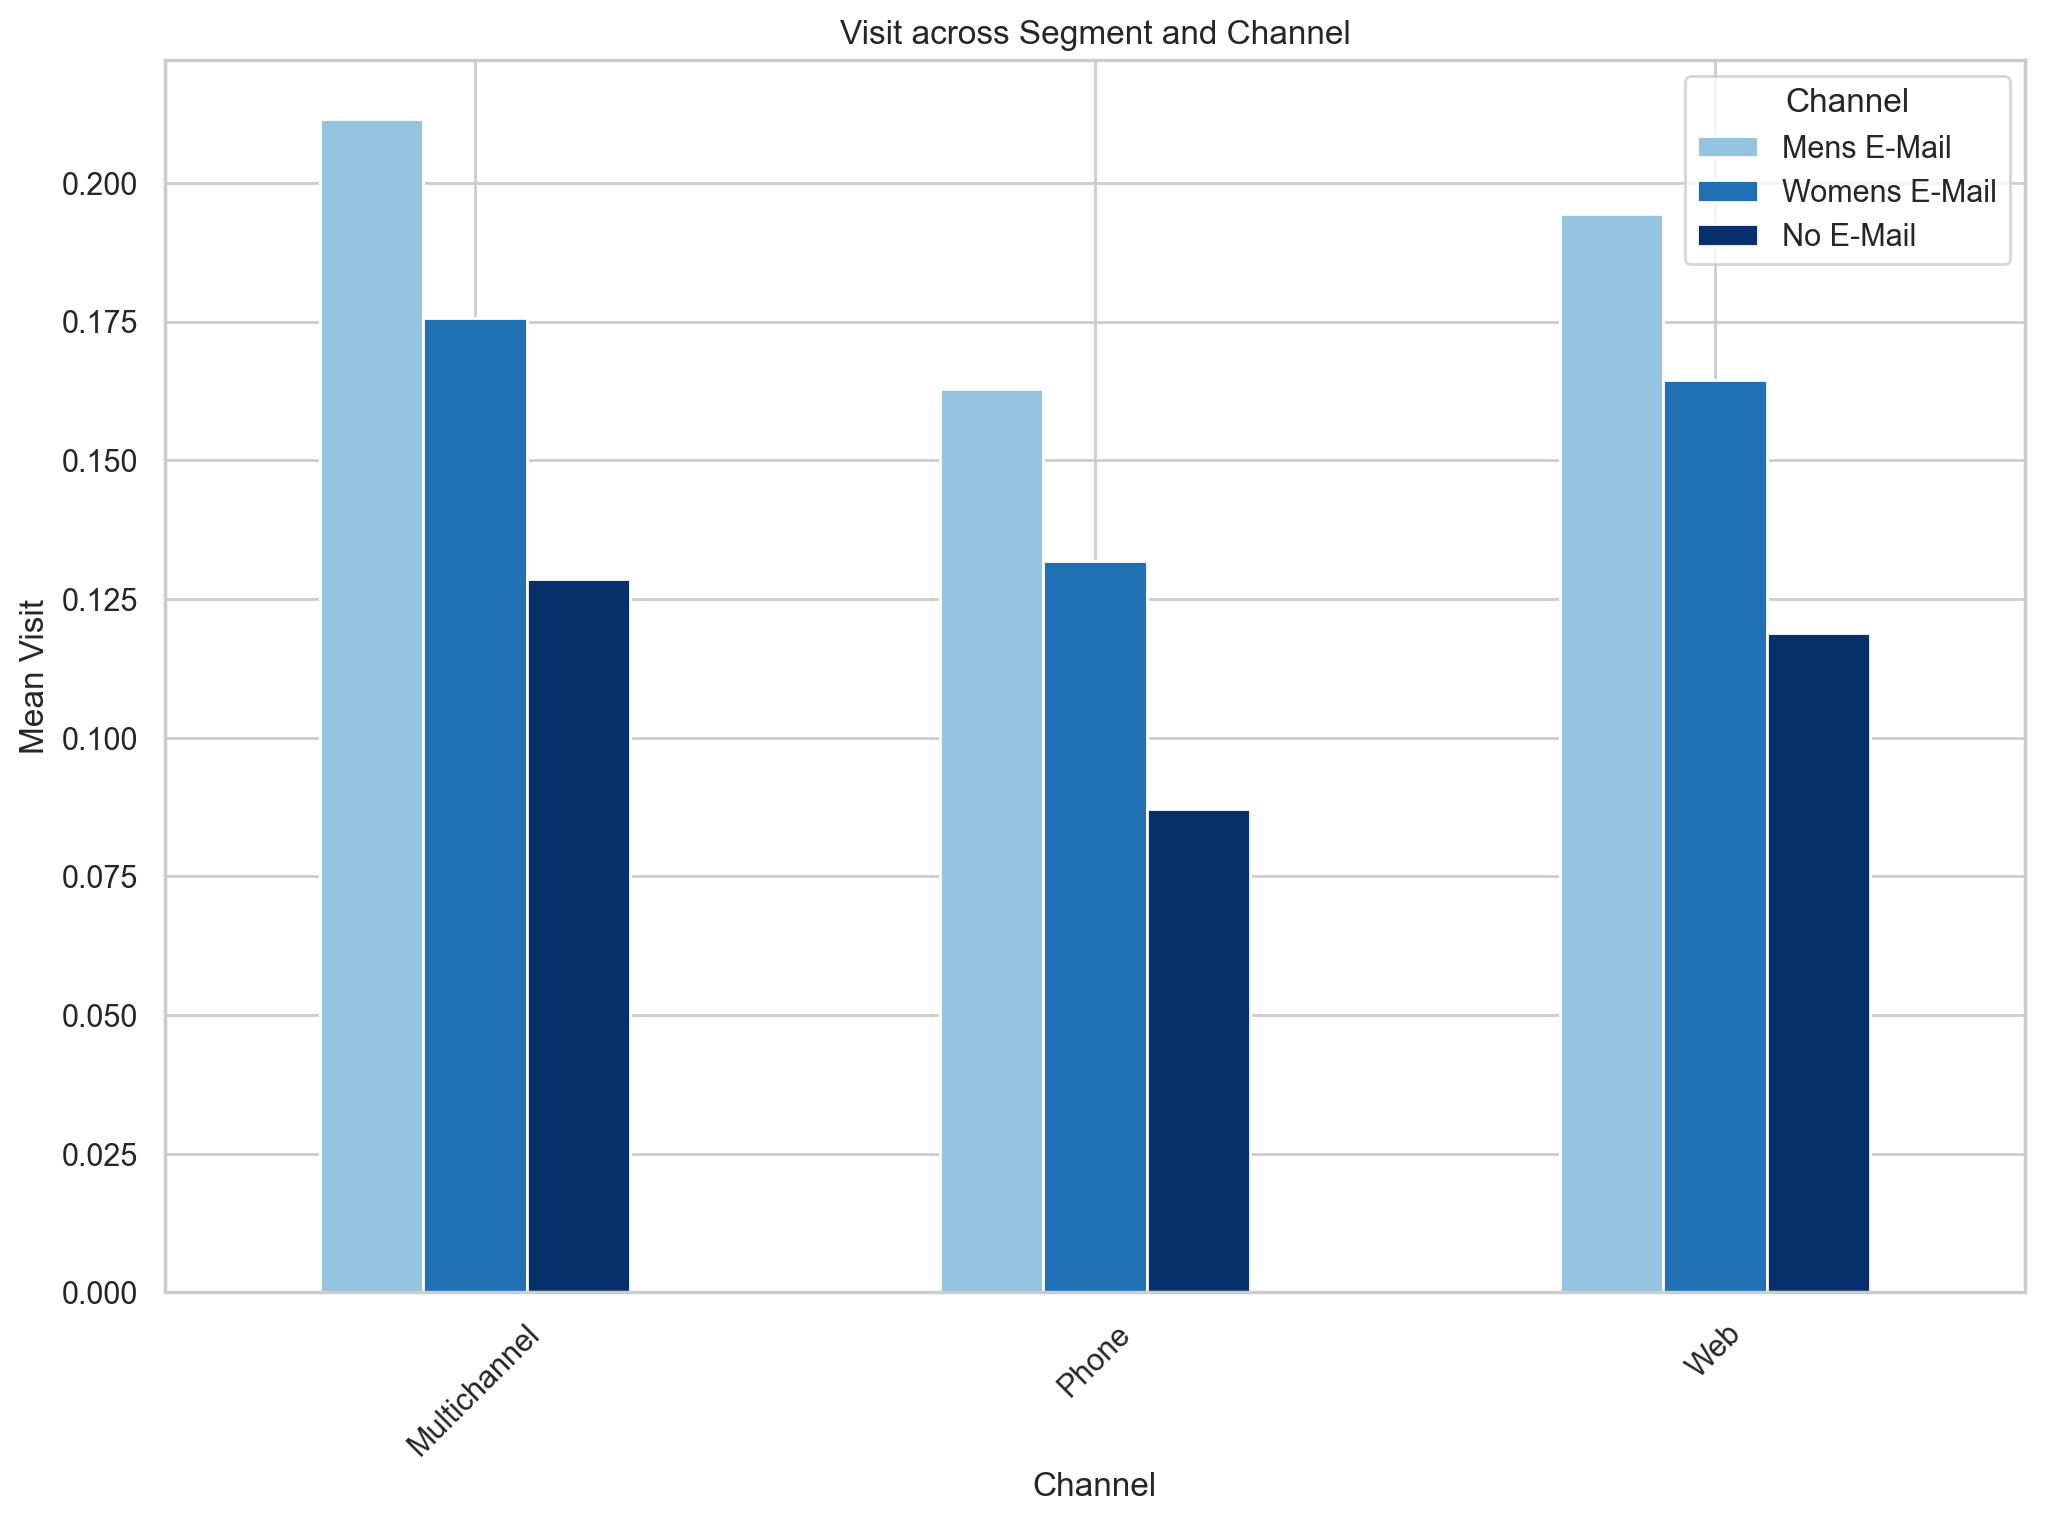

In [268]:
plot_segment_performance(df, 'channel', 'visit')

## Visits & Newbie 

### More visits for existing customers, correlate more conversions
### more engaged customers, already established relationship, more loyal, highly retained 

segment  Mens E-Mail  No E-Mail  Womens E-Mail
newbie                                        
0           0.211562   0.133729       0.173852
1           0.154127   0.078822       0.129239
segment  Mens E-Mail  No E-Mail  Womens E-Mail
newbie                                        
0              10621      10611          10624
1              10686      10695          10763


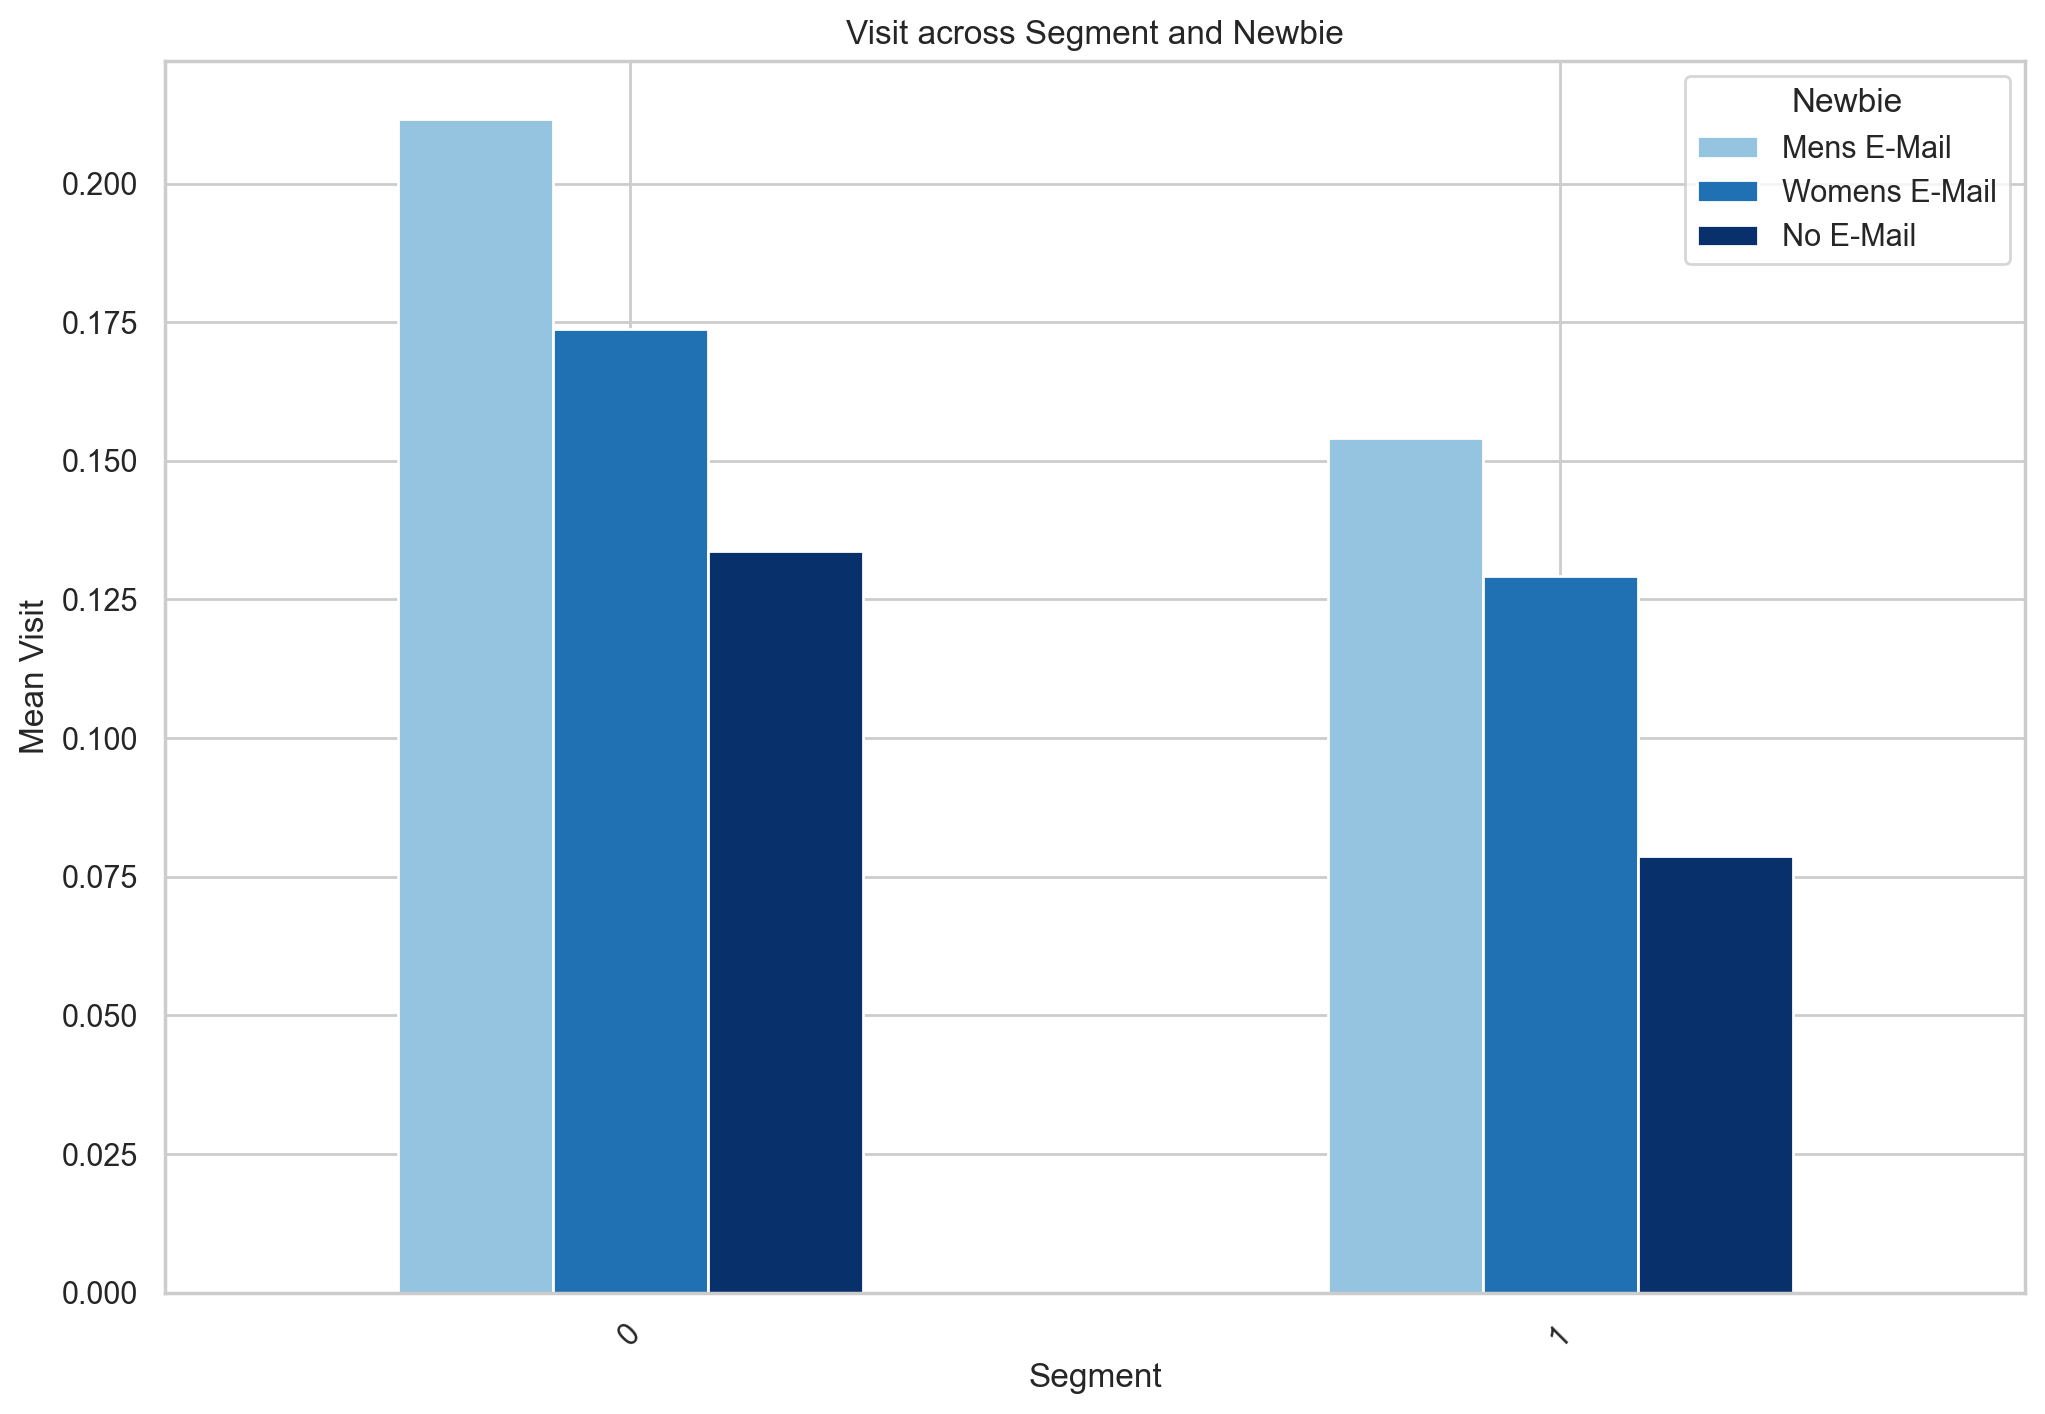

In [252]:
plot_segment_performance(df, 'newbie', 'visit')

## Visits & Zip_Code 

segment    Mens E-Mail  No E-Mail  Womens E-Mail
zip_code                                        
Rural         0.226950   0.153552       0.182647
Surburban     0.173350   0.099013       0.147876
Urban         0.176457   0.096816       0.143759
segment    Mens E-Mail  No E-Mail  Womens E-Mail
zip_code                                        
Rural             3243       3139           3181
Surburban         9501       9625           9650
Urban             8563       8542           8556


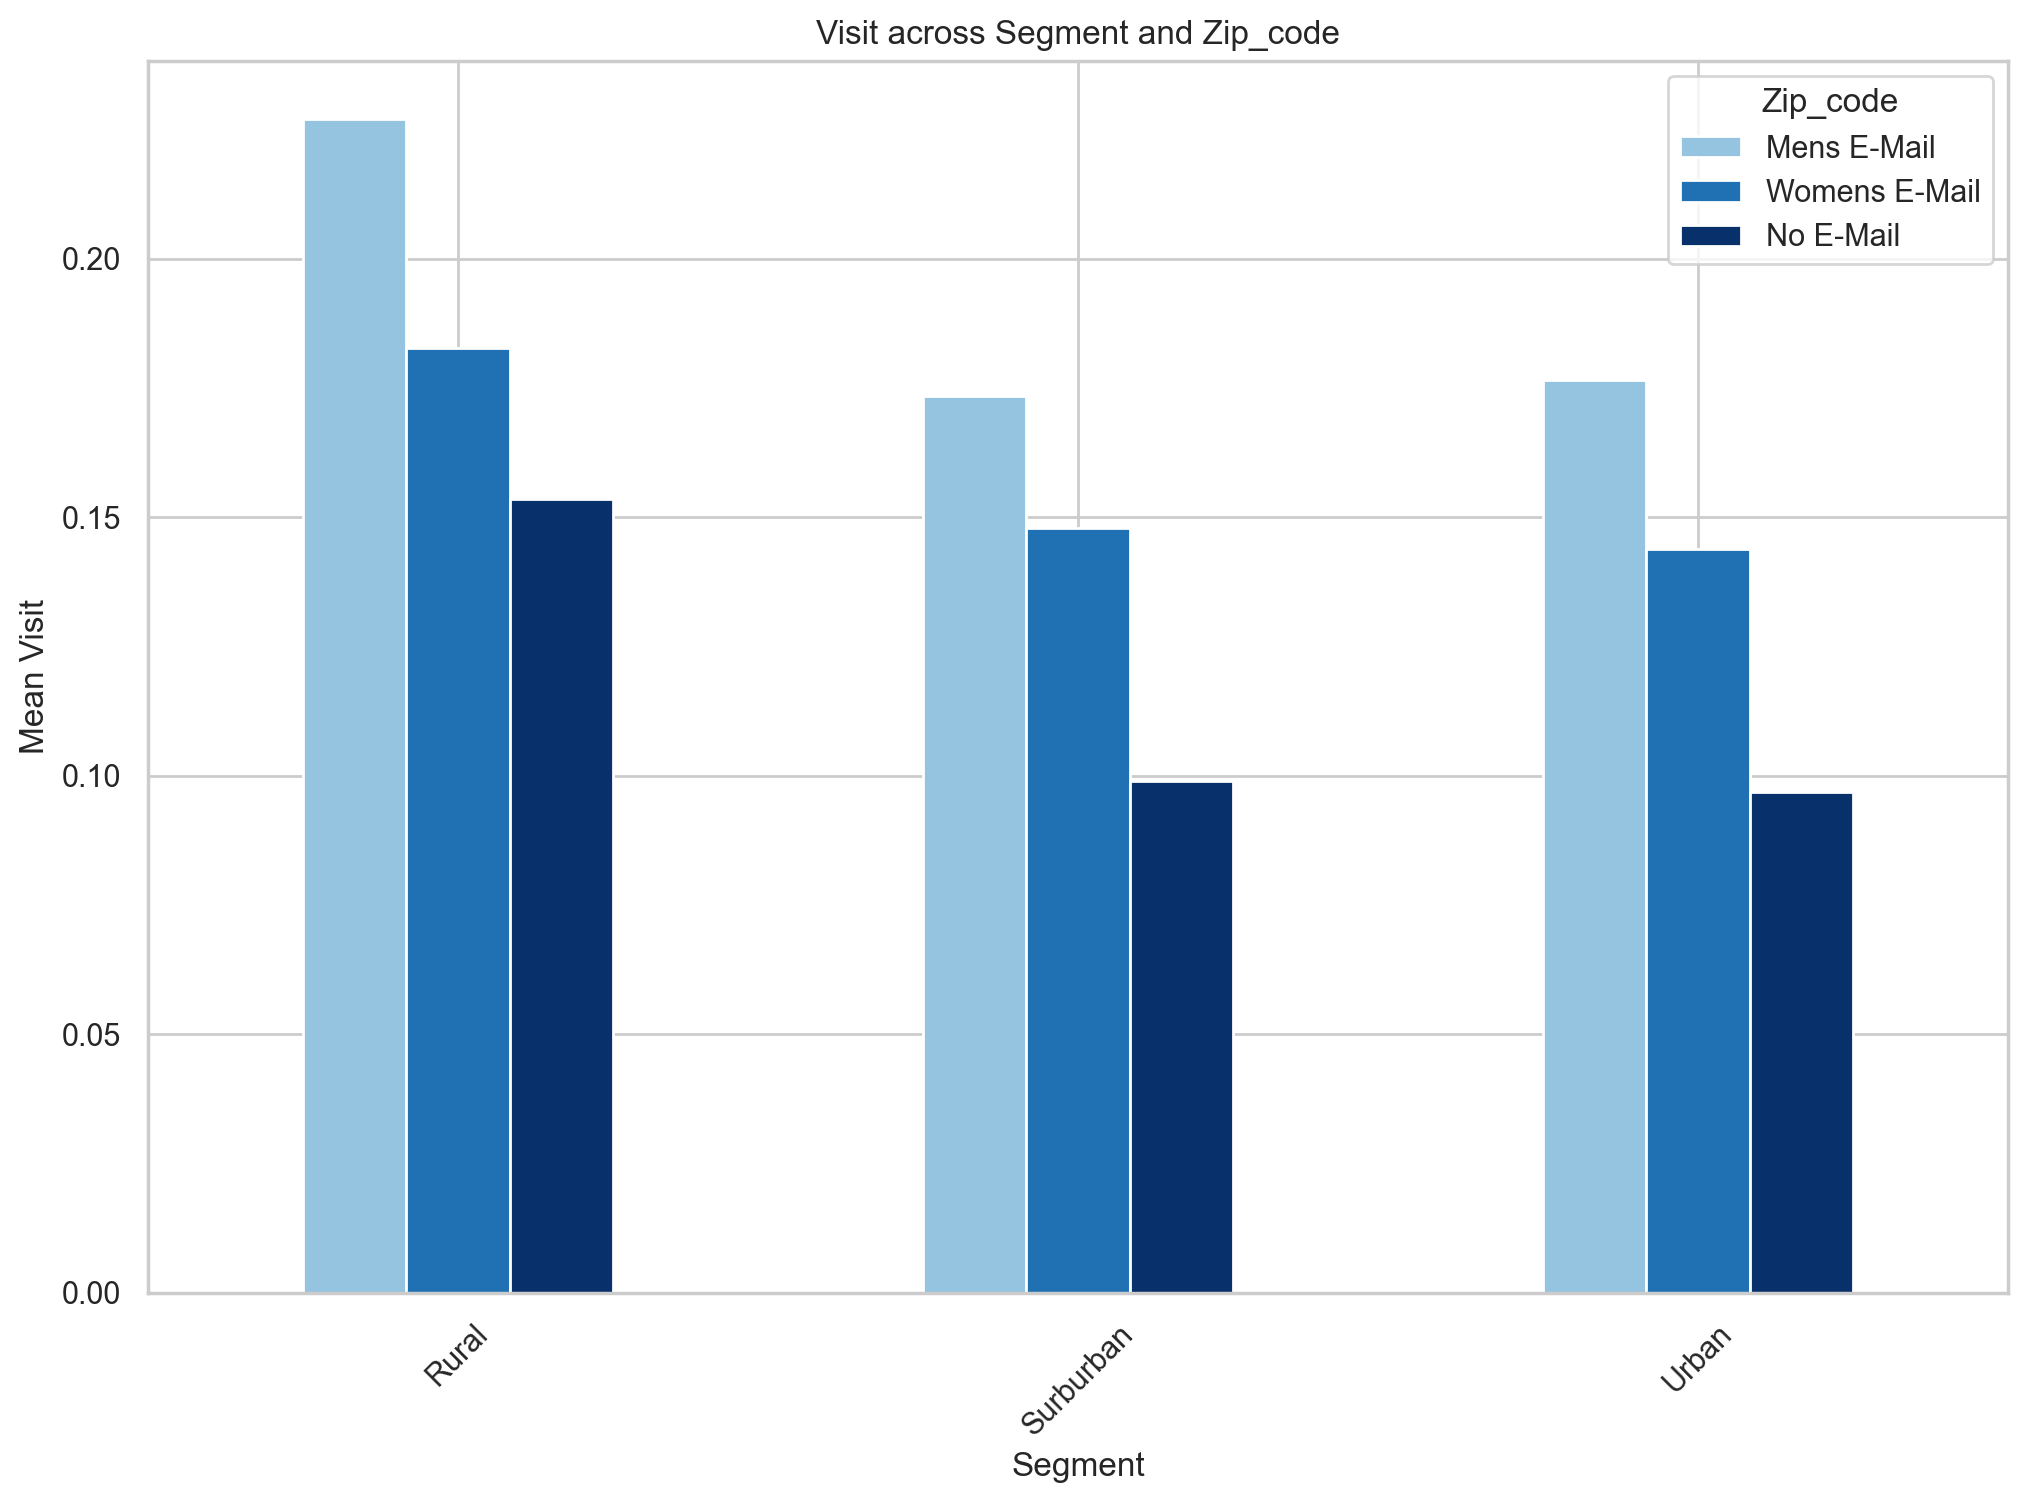

In [253]:
plot_segment_performance(df, 'zip_code', 'visit')

# Conversion

### multiple channel have higher conversion rate, potential target. quality leads, more engaged
### overall low conversion rate, could due to poor user experience, complicate checkout, no personalization

In [207]:
df.groupby('segment')['conversion'].mean()

segment
Mens E-Mail      0.012531
No E-Mail        0.005726
Womens E-Mail    0.008837
Name: conversion, dtype: float64

<Axes: xlabel='segment'>

Text(0.5, 1.0, 'Average conversion per Segment')

Text(0.5, 0, 'Segment')

Text(0, 0.5, 'Average conversion')

(array([0, 1, 2]),
 [Text(0, 0, 'Mens E-Mail'),
  Text(1, 0, 'No E-Mail'),
  Text(2, 0, 'Womens E-Mail')])

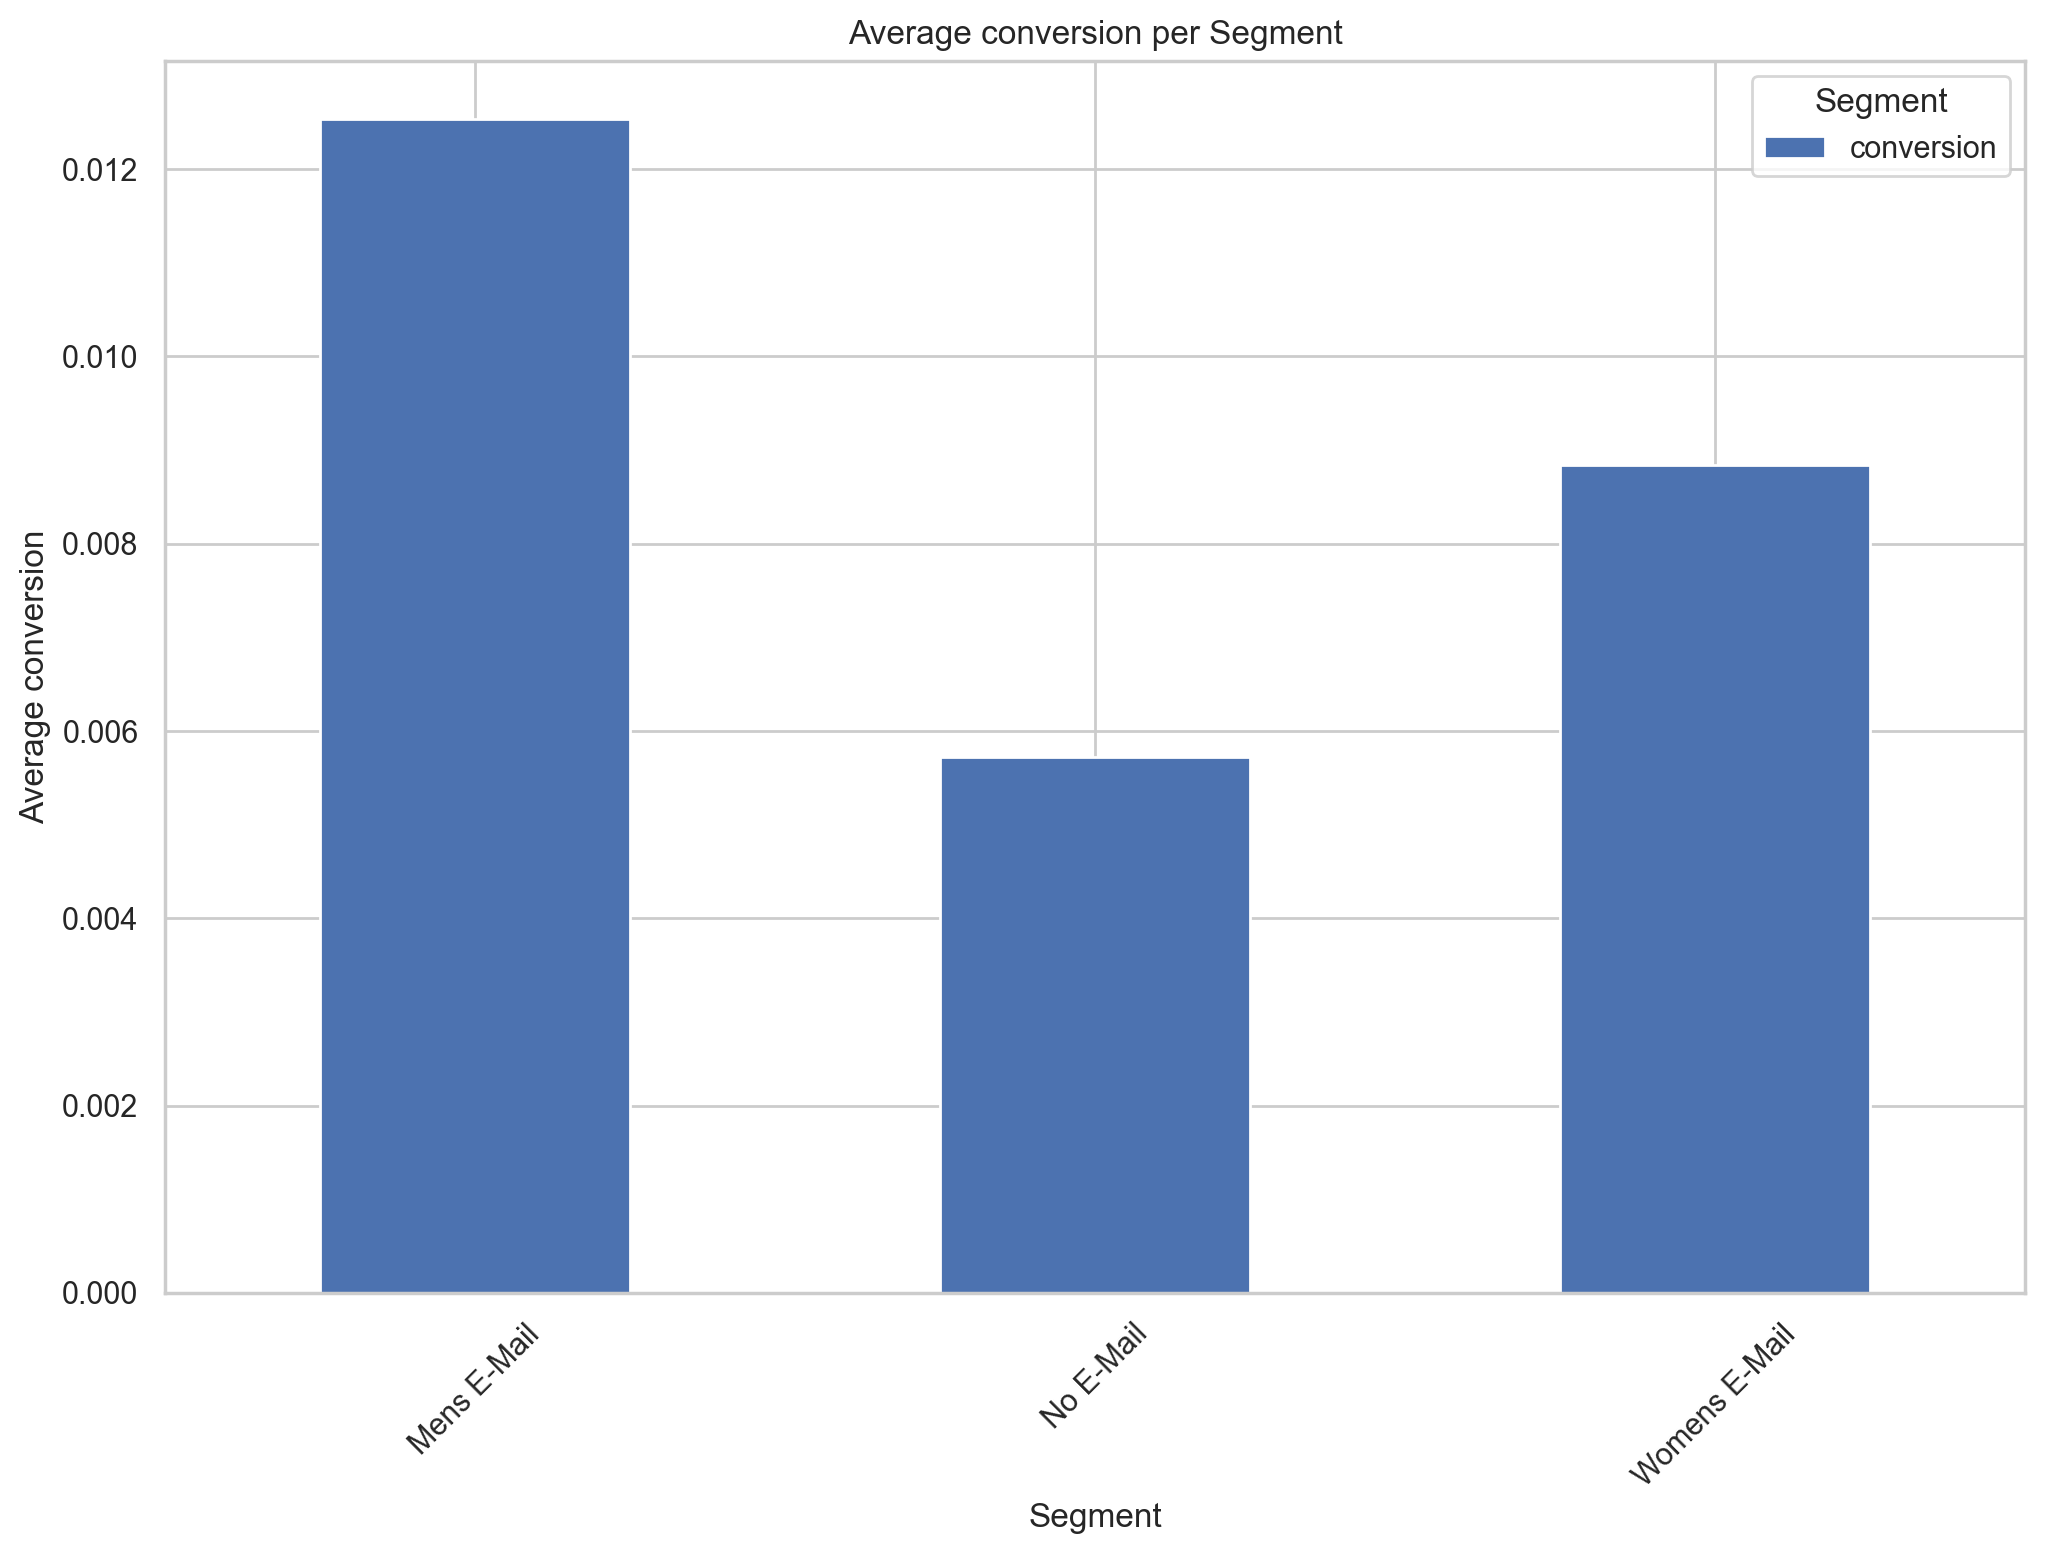

In [208]:
df.groupby('segment')['conversion'].mean().plot(kind='bar', figsize=(12, 8)) 
plt.title('Average conversion per Segment') 
plt.xlabel('Segment') 
plt.ylabel('Average conversion') 
plt.legend(title='Segment') 
plt.xticks(rotation=45)
plt.show()

## Conversion & Channels

segment       Mens E-Mail  No E-Mail  Womens E-Mail
channel                                            
Multichannel     0.017074   0.006907       0.013959
Phone            0.010823   0.005361       0.007087
Web              0.012961   0.005761       0.009194
segment       Mens E-Mail  No E-Mail  Womens E-Mail
channel                                            
Multichannel         2577       2606           2579
Phone                9240       9327           9454
Web                  9490       9373           9354


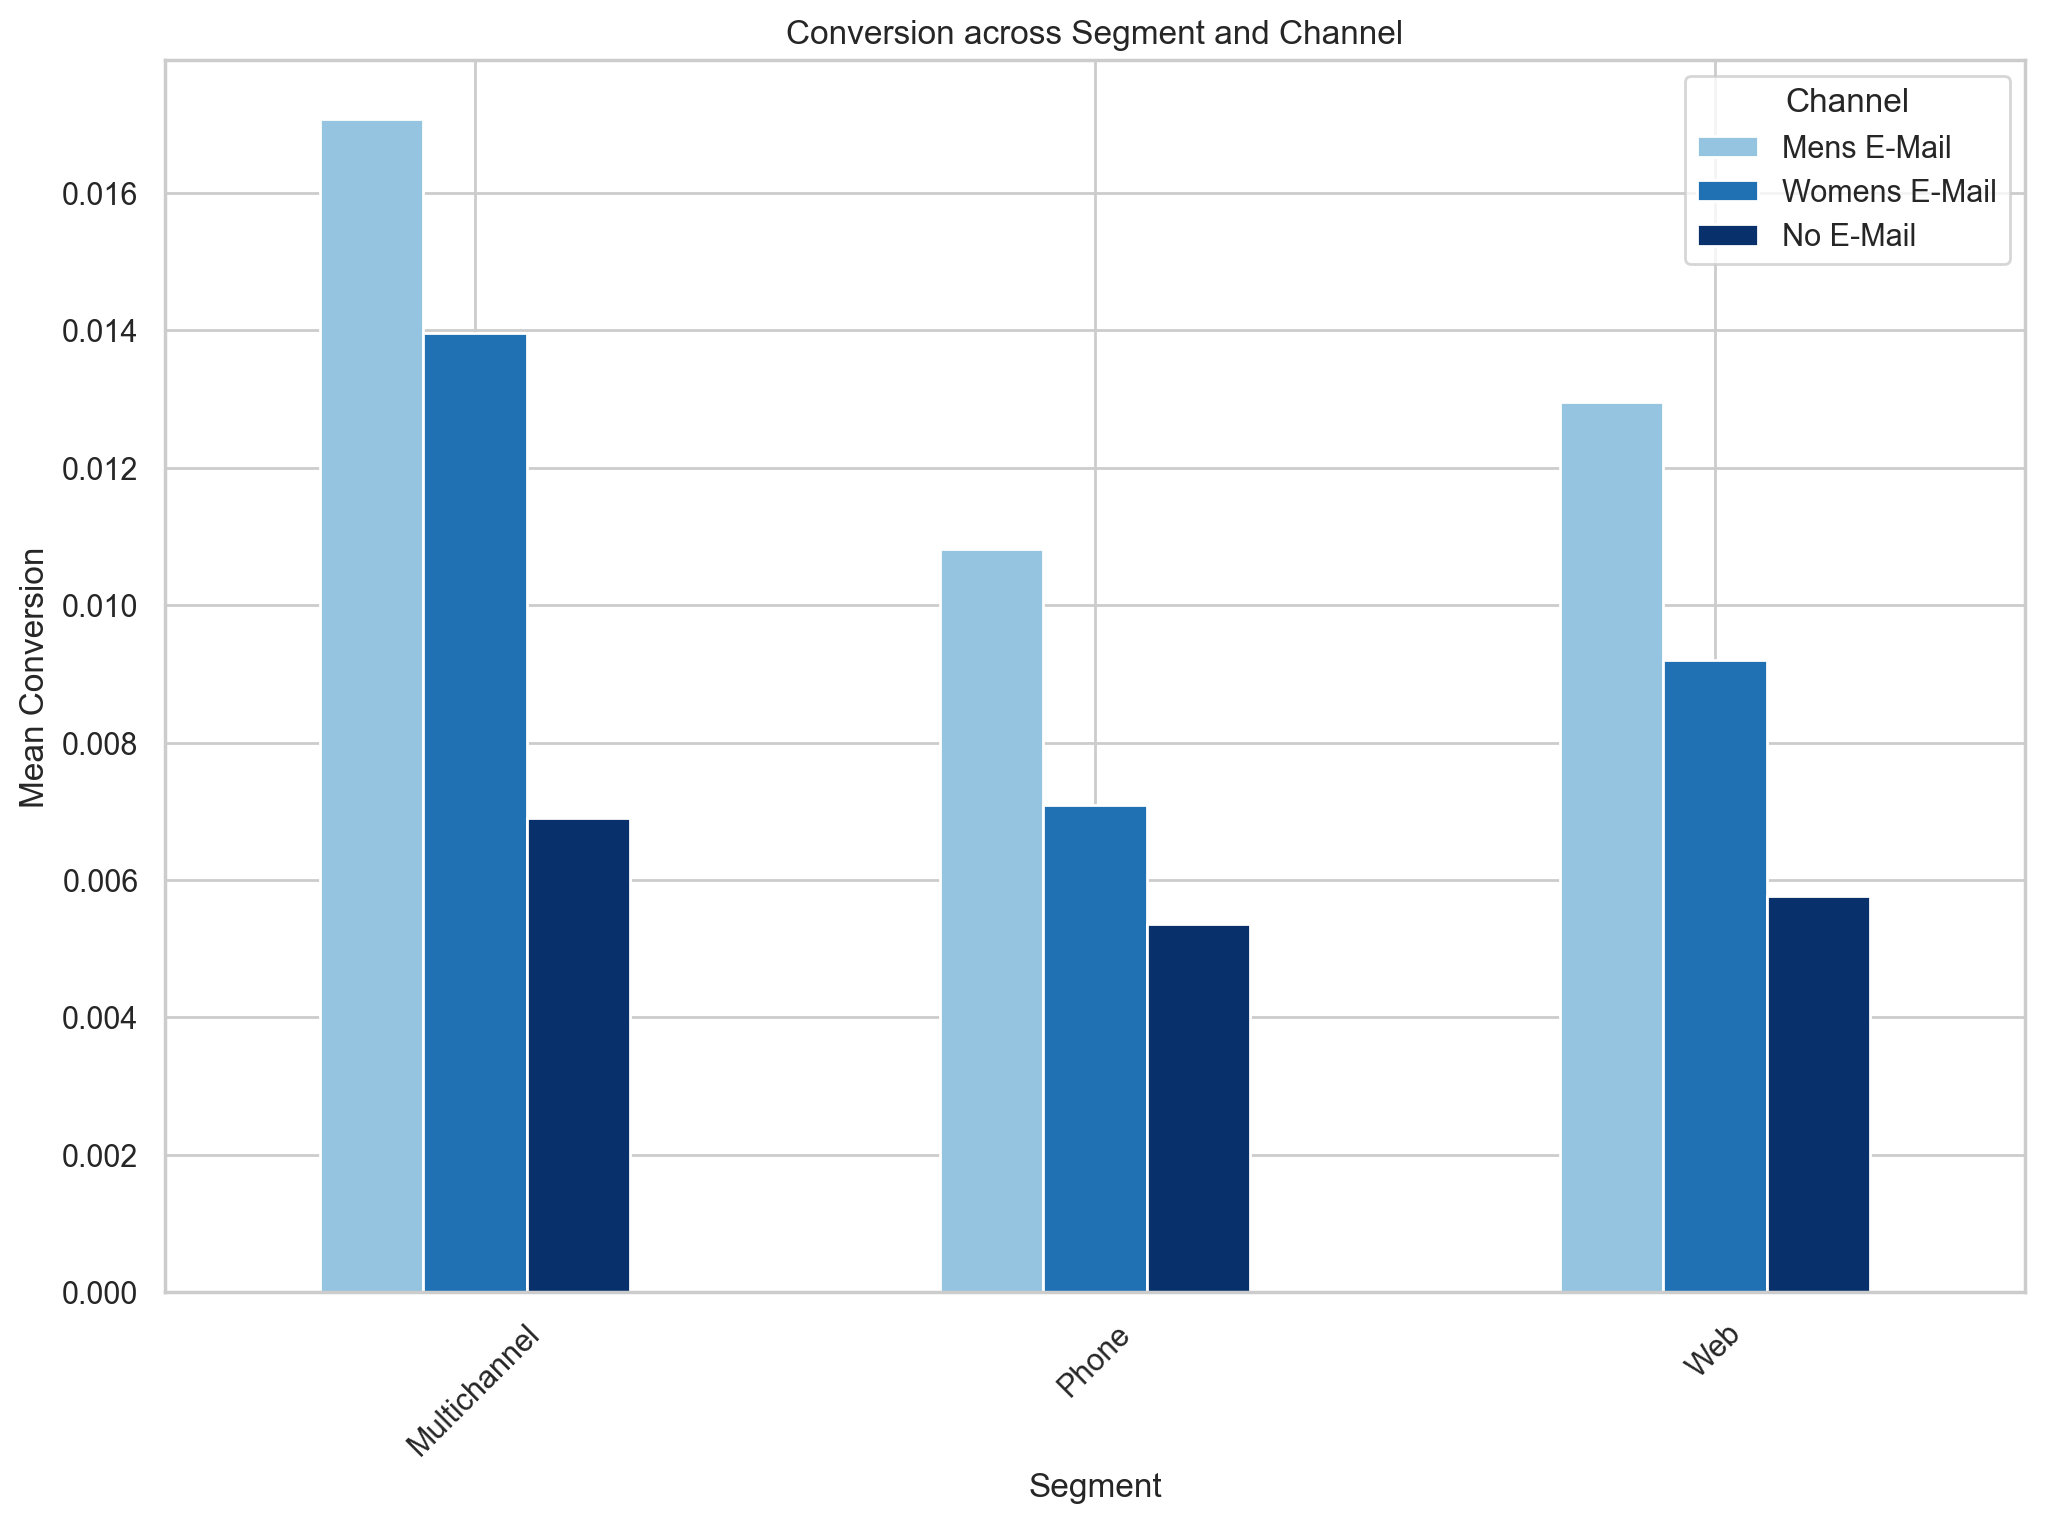

In [254]:
plot_segment_performance(df, 'channel', 'conversion')

## Conversion & Newbie

segment  Mens E-Mail  No E-Mail  Womens E-Mail
newbie                                        
0           0.013935   0.007728       0.008660
1           0.011136   0.003740       0.009012
segment  Mens E-Mail  No E-Mail  Womens E-Mail
newbie                                        
0              10621      10611          10624
1              10686      10695          10763


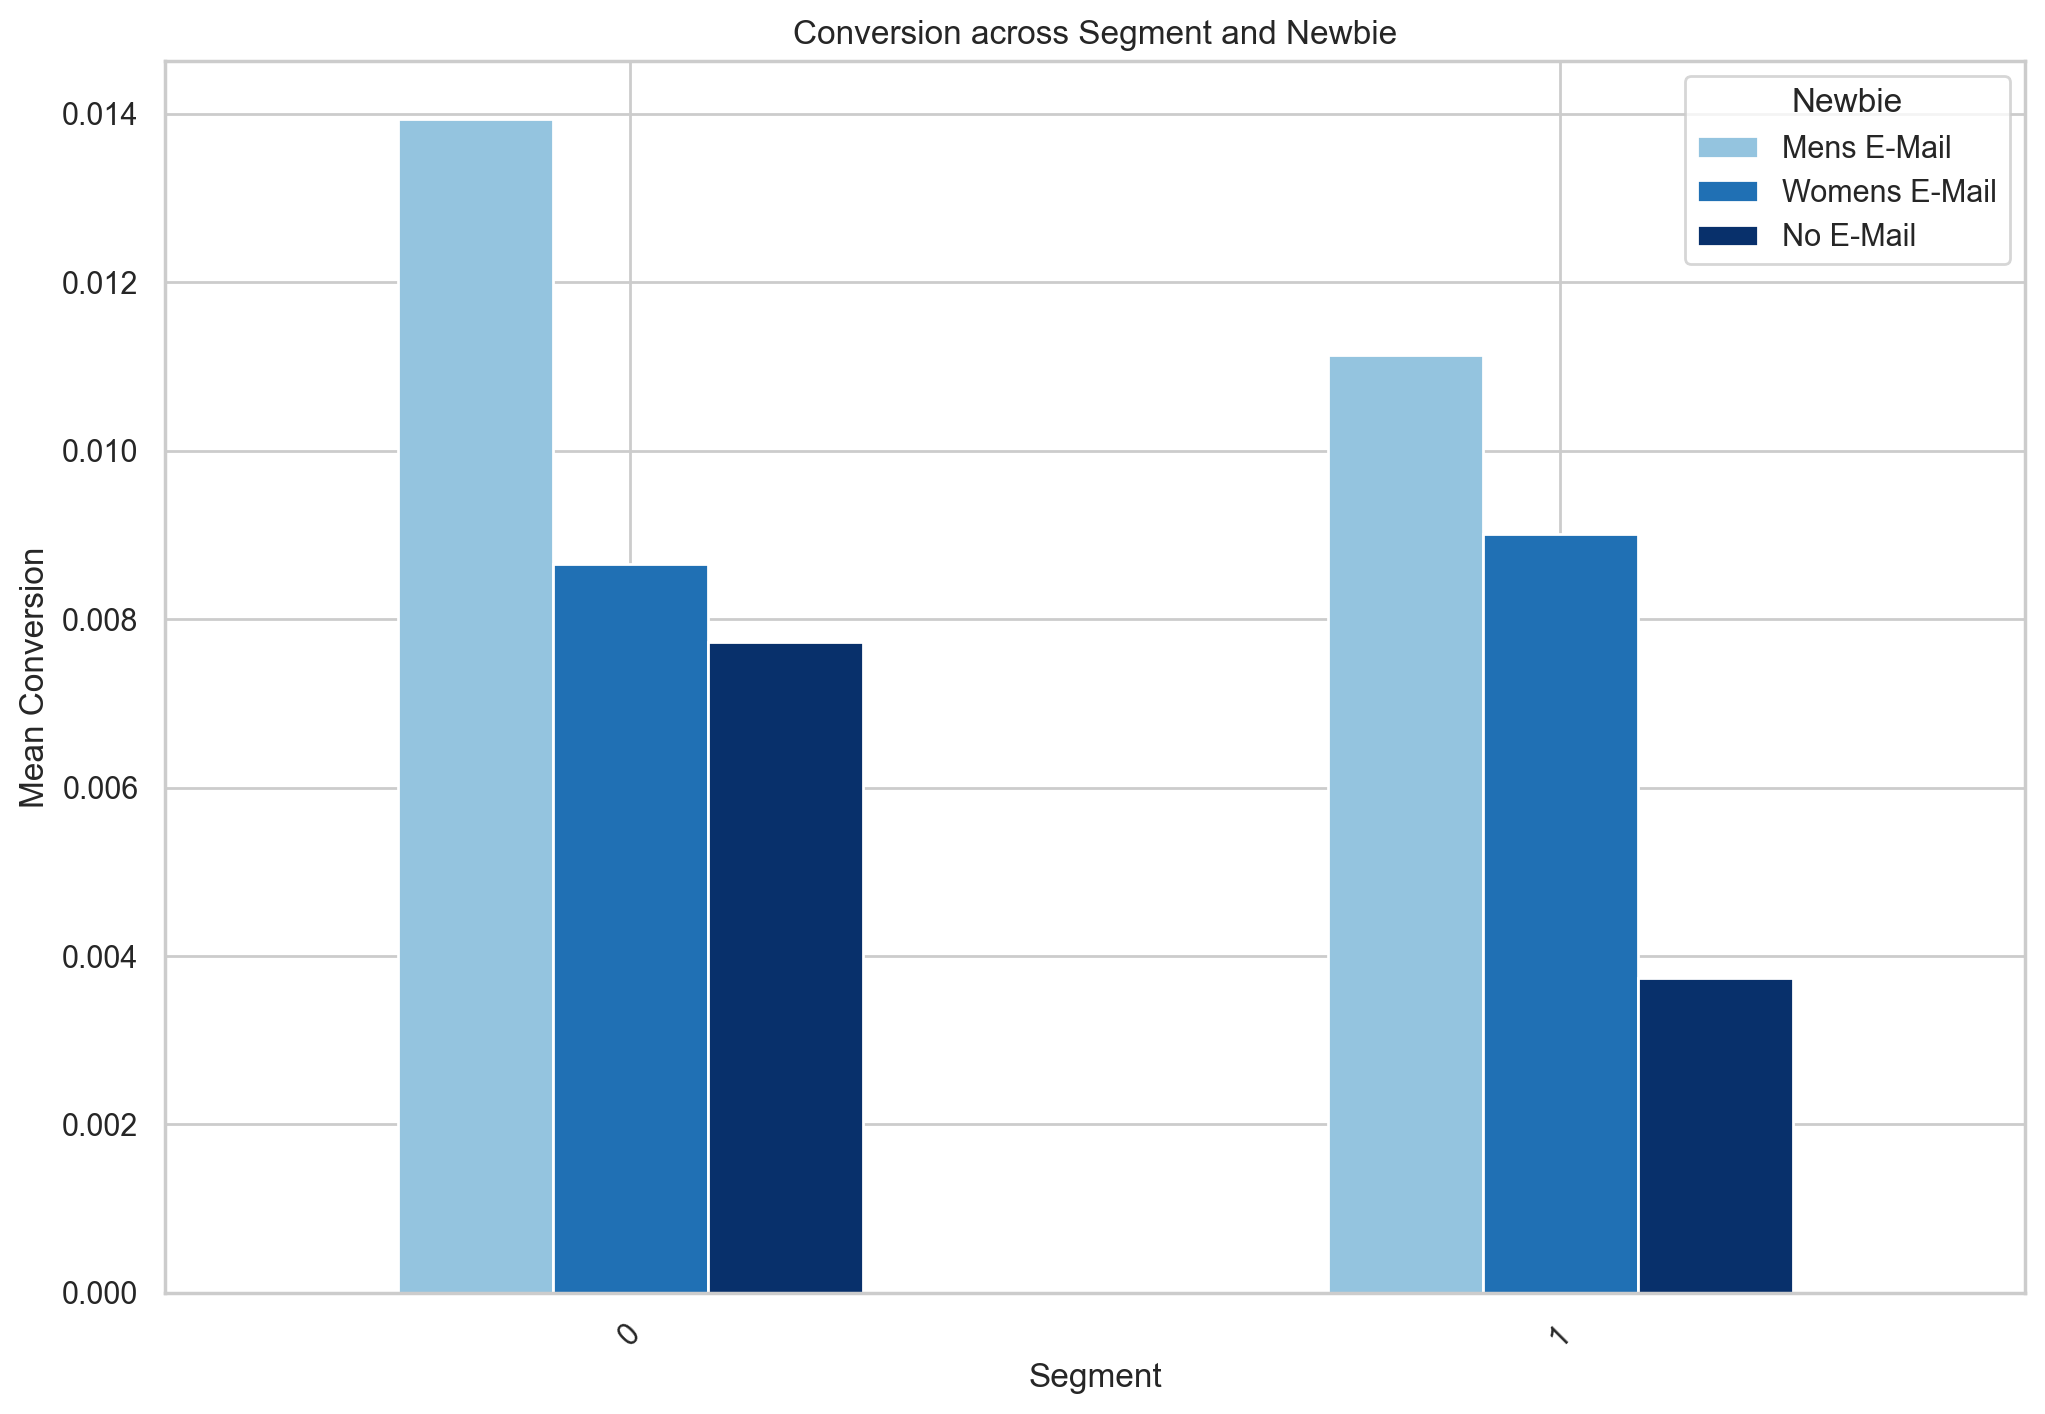

In [255]:
plot_segment_performance(df, 'newbie', 'conversion')

## Conversion & ZipCode

segment    Mens E-Mail  No E-Mail  Womens E-Mail
zip_code                                        
Rural         0.013568   0.008283       0.011632
Surburban     0.012420   0.004987       0.007565
Urban         0.012262   0.005619       0.009233
segment    Mens E-Mail  No E-Mail  Womens E-Mail
zip_code                                        
Rural             3243       3139           3181
Surburban         9501       9625           9650
Urban             8563       8542           8556


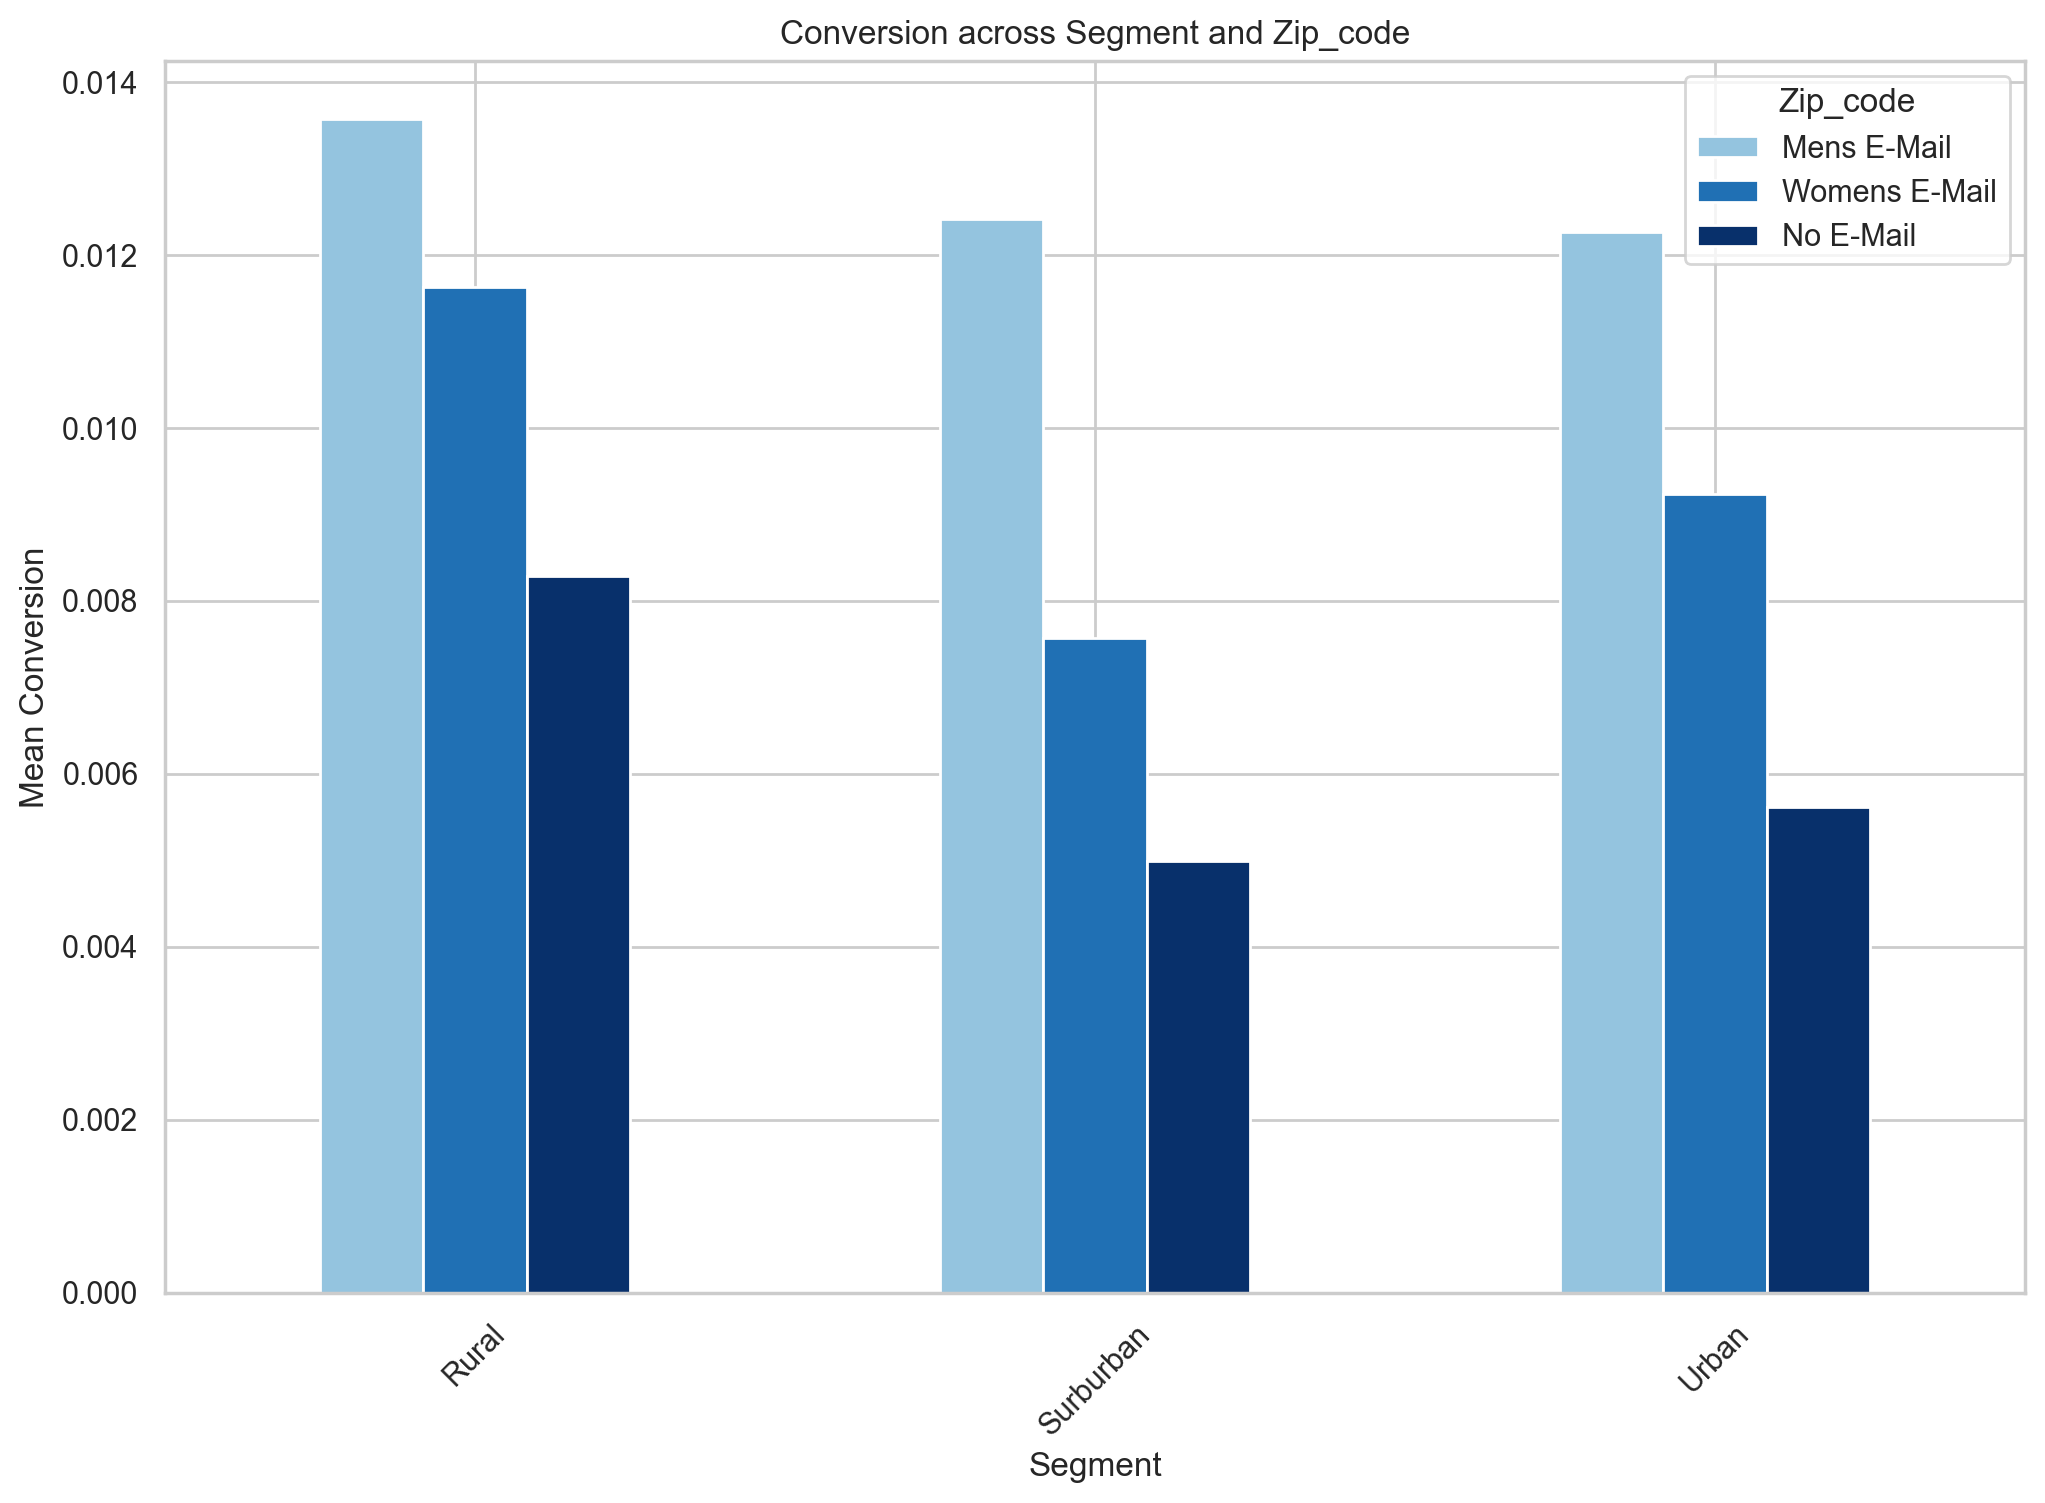

In [256]:
plot_segment_performance(df, 'zip_code', 'conversion')

# Spend

In [212]:
df['spend'].mean()
df['spend'].loc[df['conversion'] == 1].mean()
df['spend'].loc[df['conversion'] == 1].median()
df['spend'].loc[df['conversion'] == 1].min()
df['spend'].loc[df['conversion'] == 1].max()

1.05090828125

116.36354671280277

80.795

29.99

499.0

## Spend & Channel

segment       Mens E-Mail  No E-Mail  Womens E-Mail
channel                                            
Multichannel       76.865     51.320         91.635
Phone              69.075     92.295        101.090
Web                62.120     80.740         87.675
segment       Mens E-Mail  No E-Mail  Womens E-Mail
channel                                            
Multichannel           44         18             36
Phone                 100         50             67
Web                   123         54             86


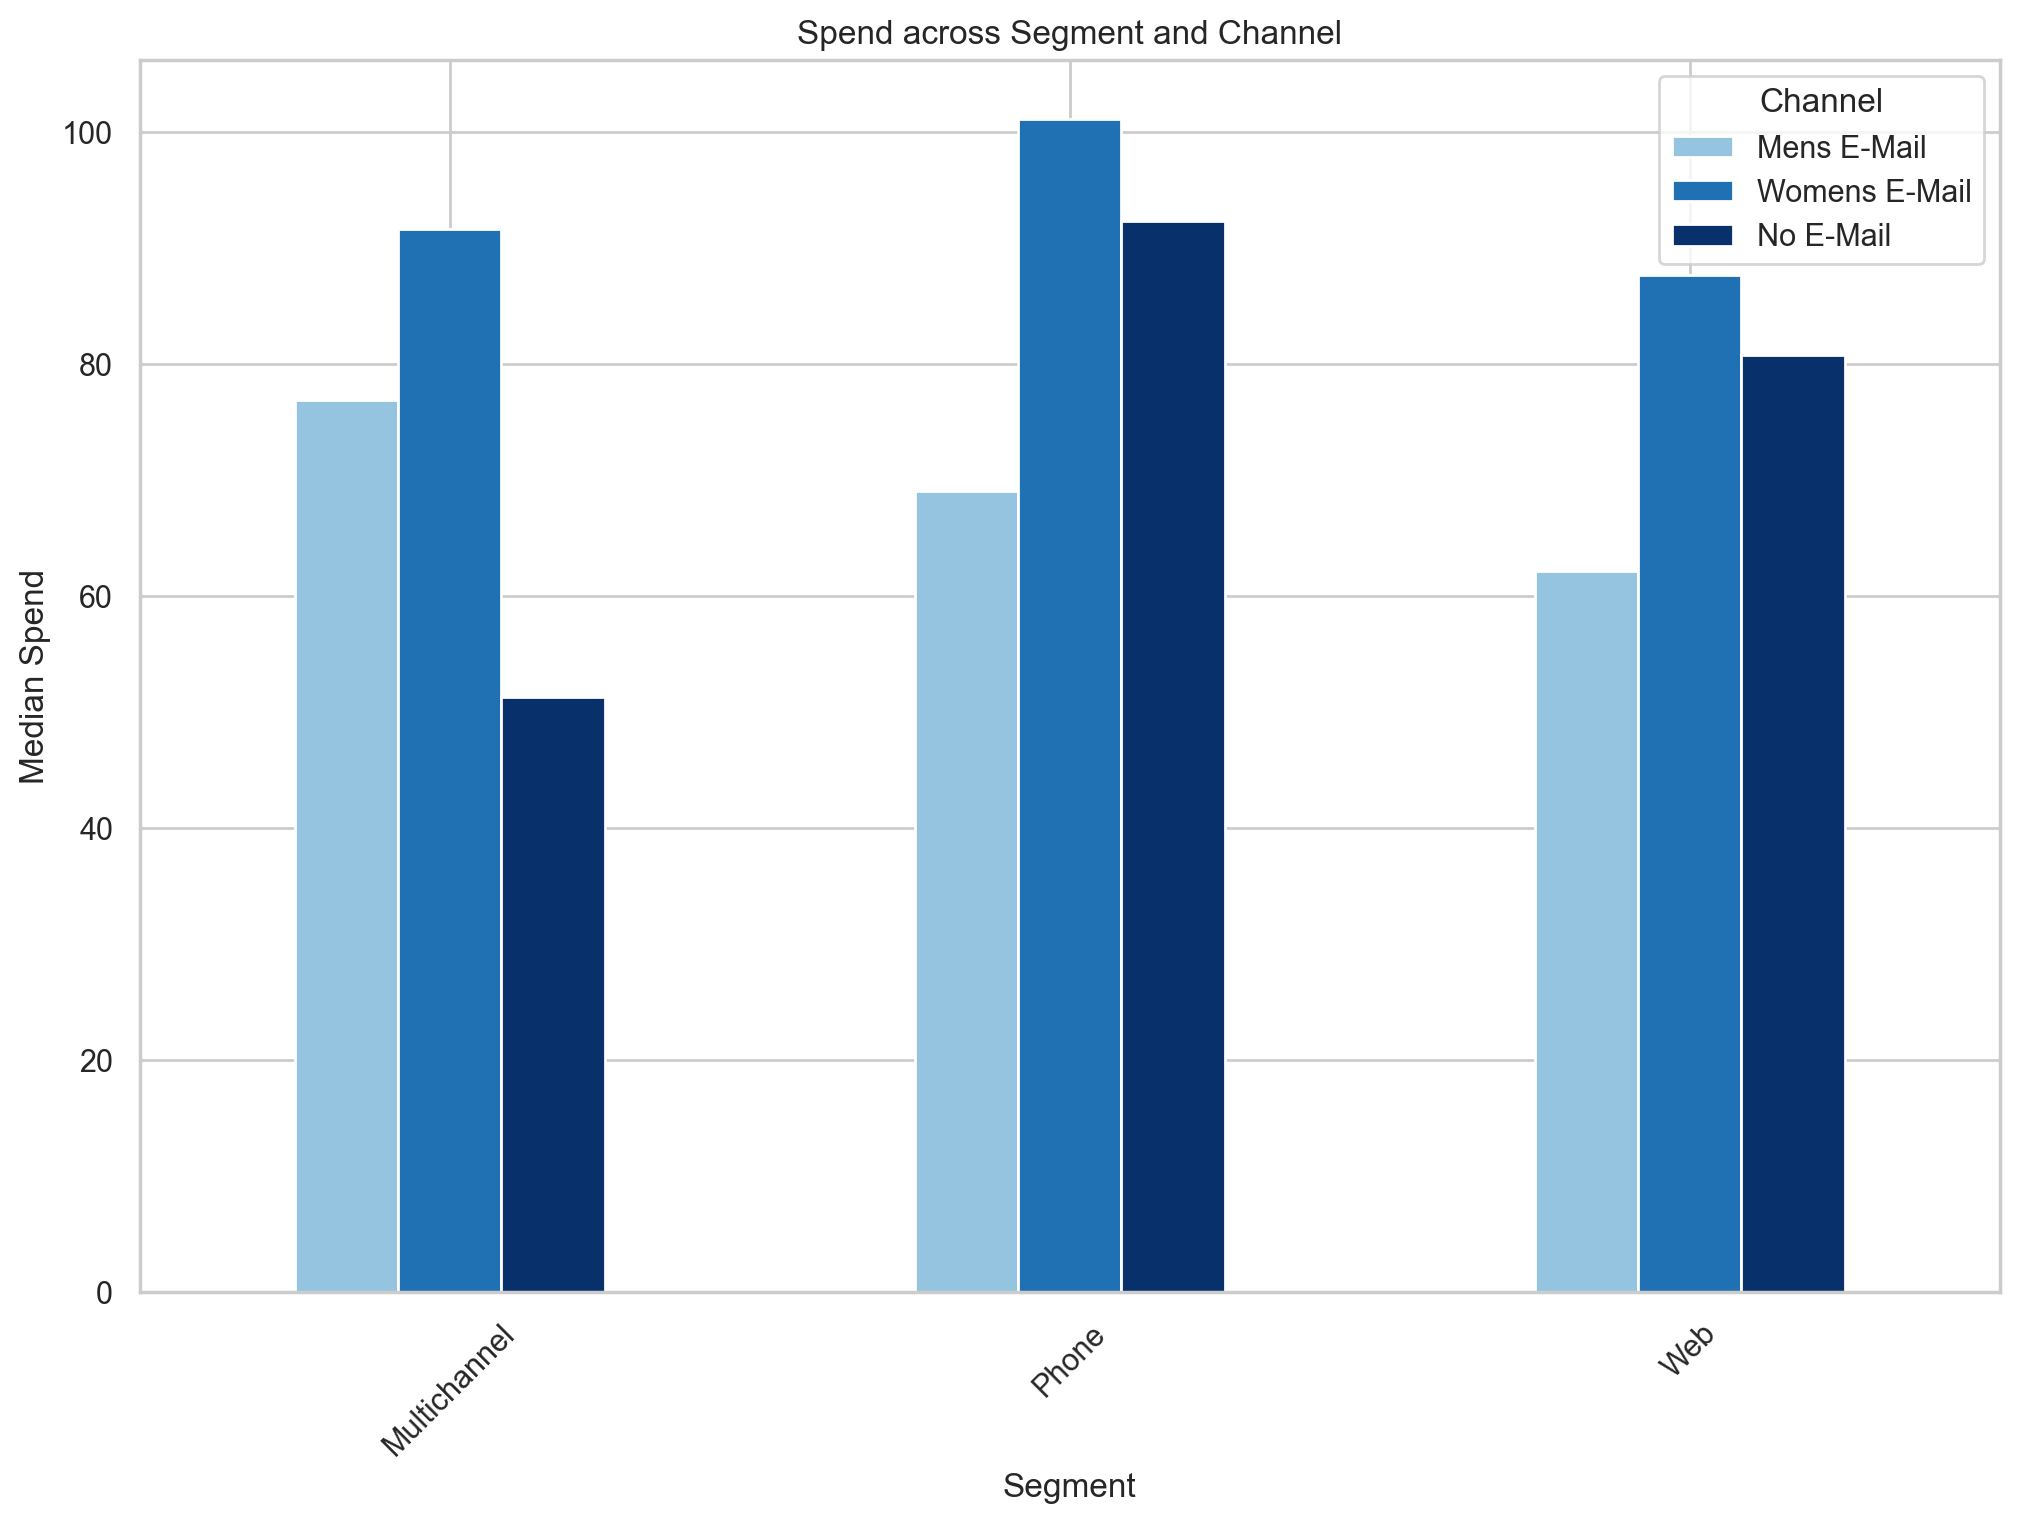

In [257]:
plot_segment_performance(df.loc[df['conversion'] == 1], 'channel', 'spend')

## Spend & Newbie

segment  Mens E-Mail  No E-Mail  Womens E-Mail
newbie                                        
0             66.125     87.195         89.155
1             68.370     88.365        101.090
segment  Mens E-Mail  No E-Mail  Womens E-Mail
newbie                                        
0                148         82             92
1                119         40             97


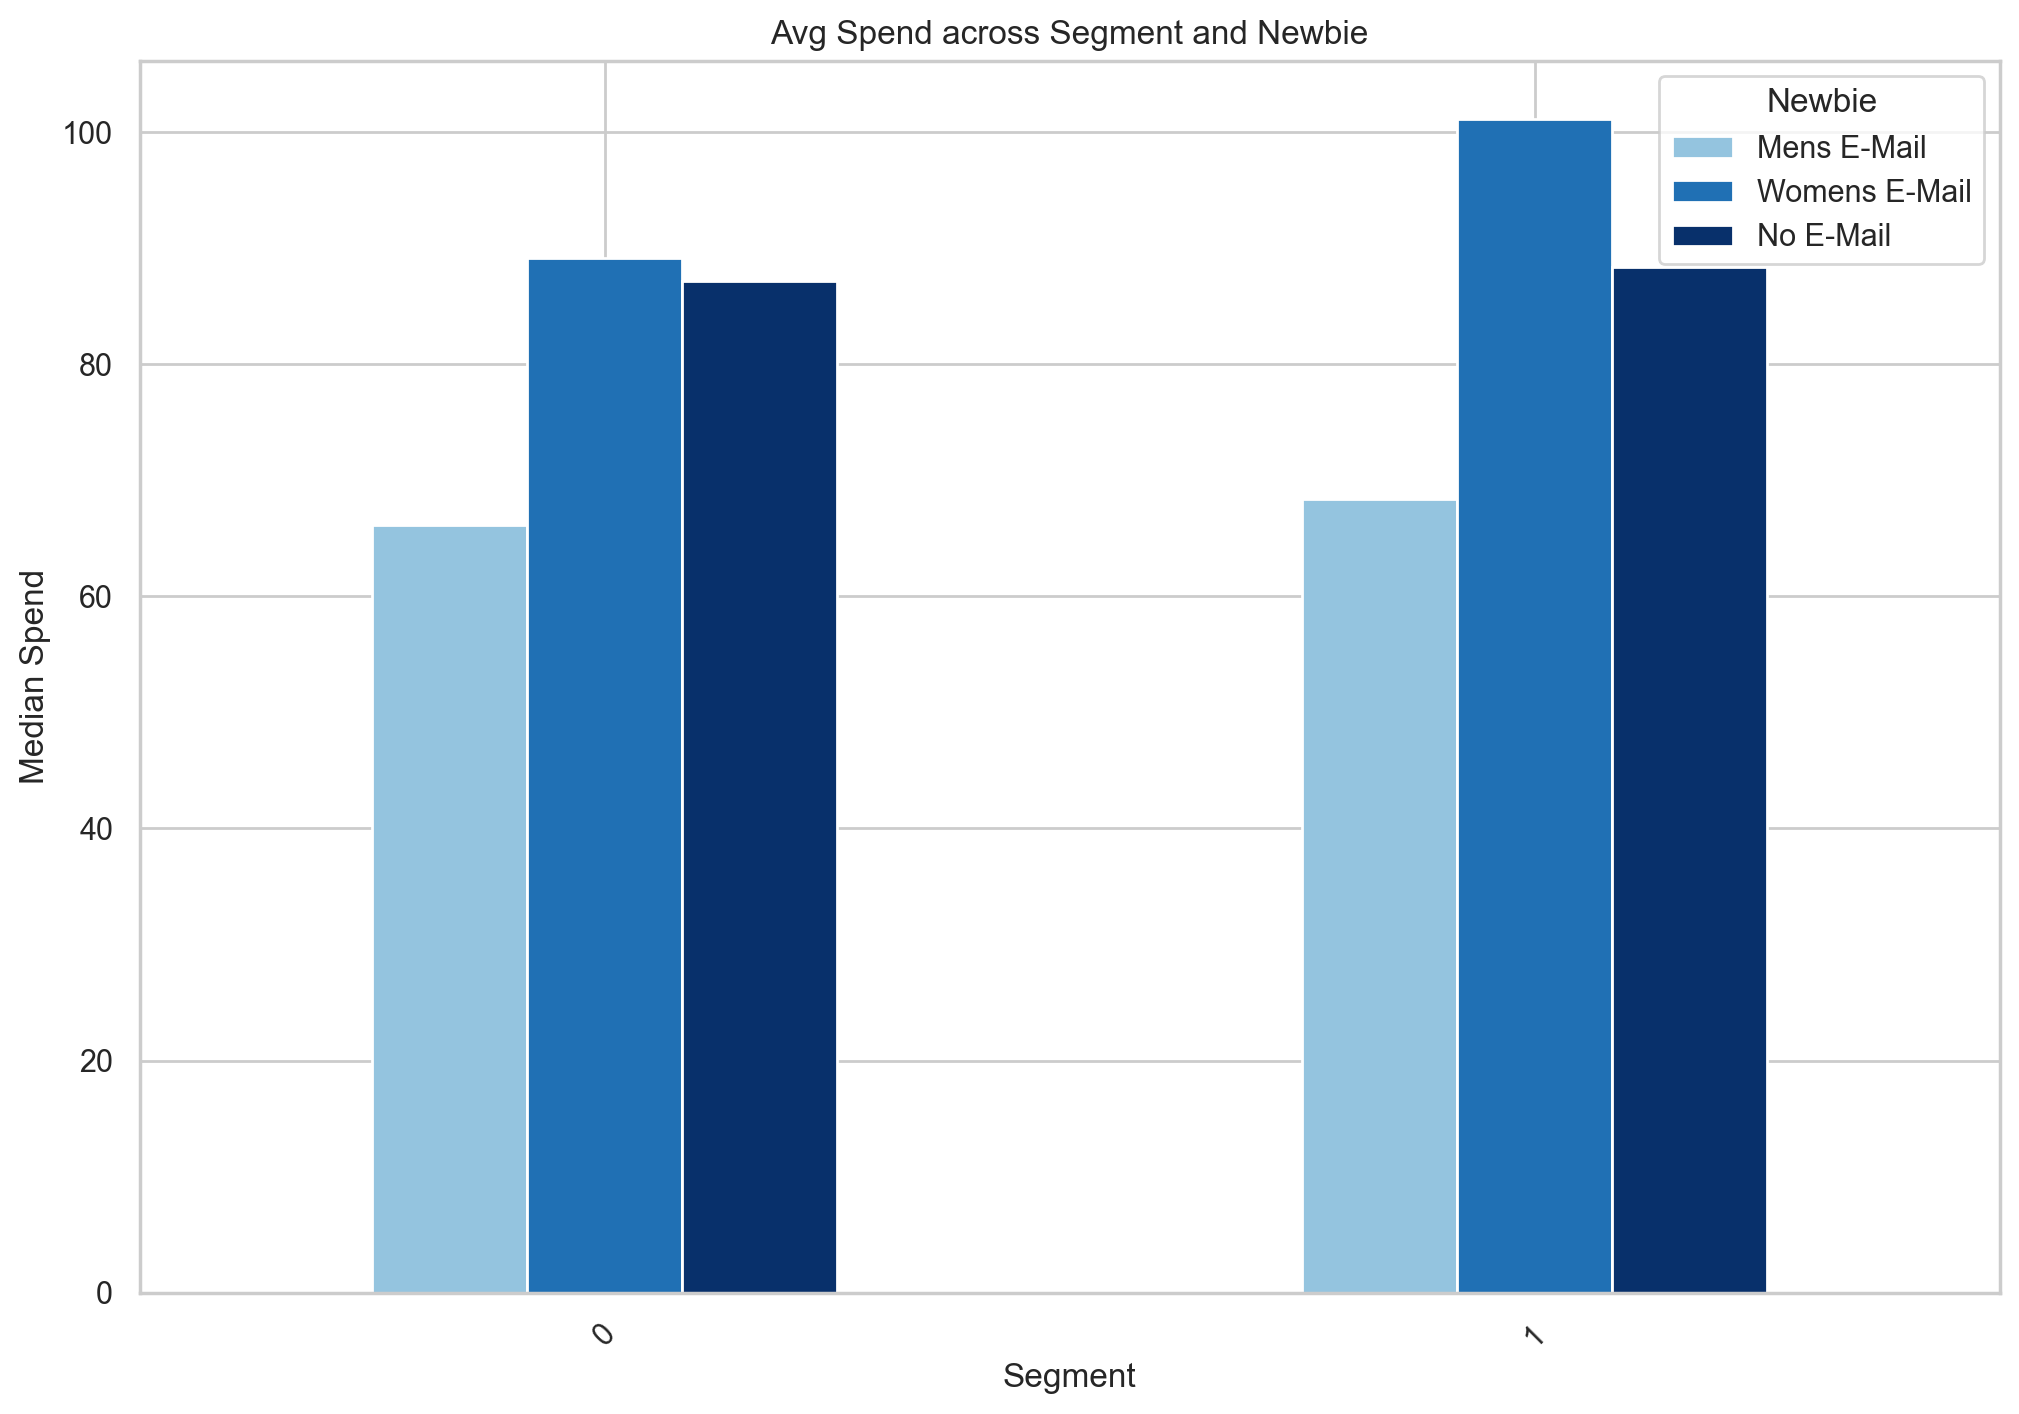

In [214]:
plot_segment_performance(df.loc[df['conversion'] == 1], 'newbie', 'spend')

## Spend & Zipcode

segment    Mens E-Mail  No E-Mail  Womens E-Mail
zip_code                                        
Rural           93.765     75.970          70.85
Surburban       65.365    101.210          83.91
Urban           65.490     76.975         109.64
segment    Mens E-Mail  No E-Mail  Womens E-Mail
zip_code                                        
Rural               44         26             37
Surburban          118         48             73
Urban              105         48             79


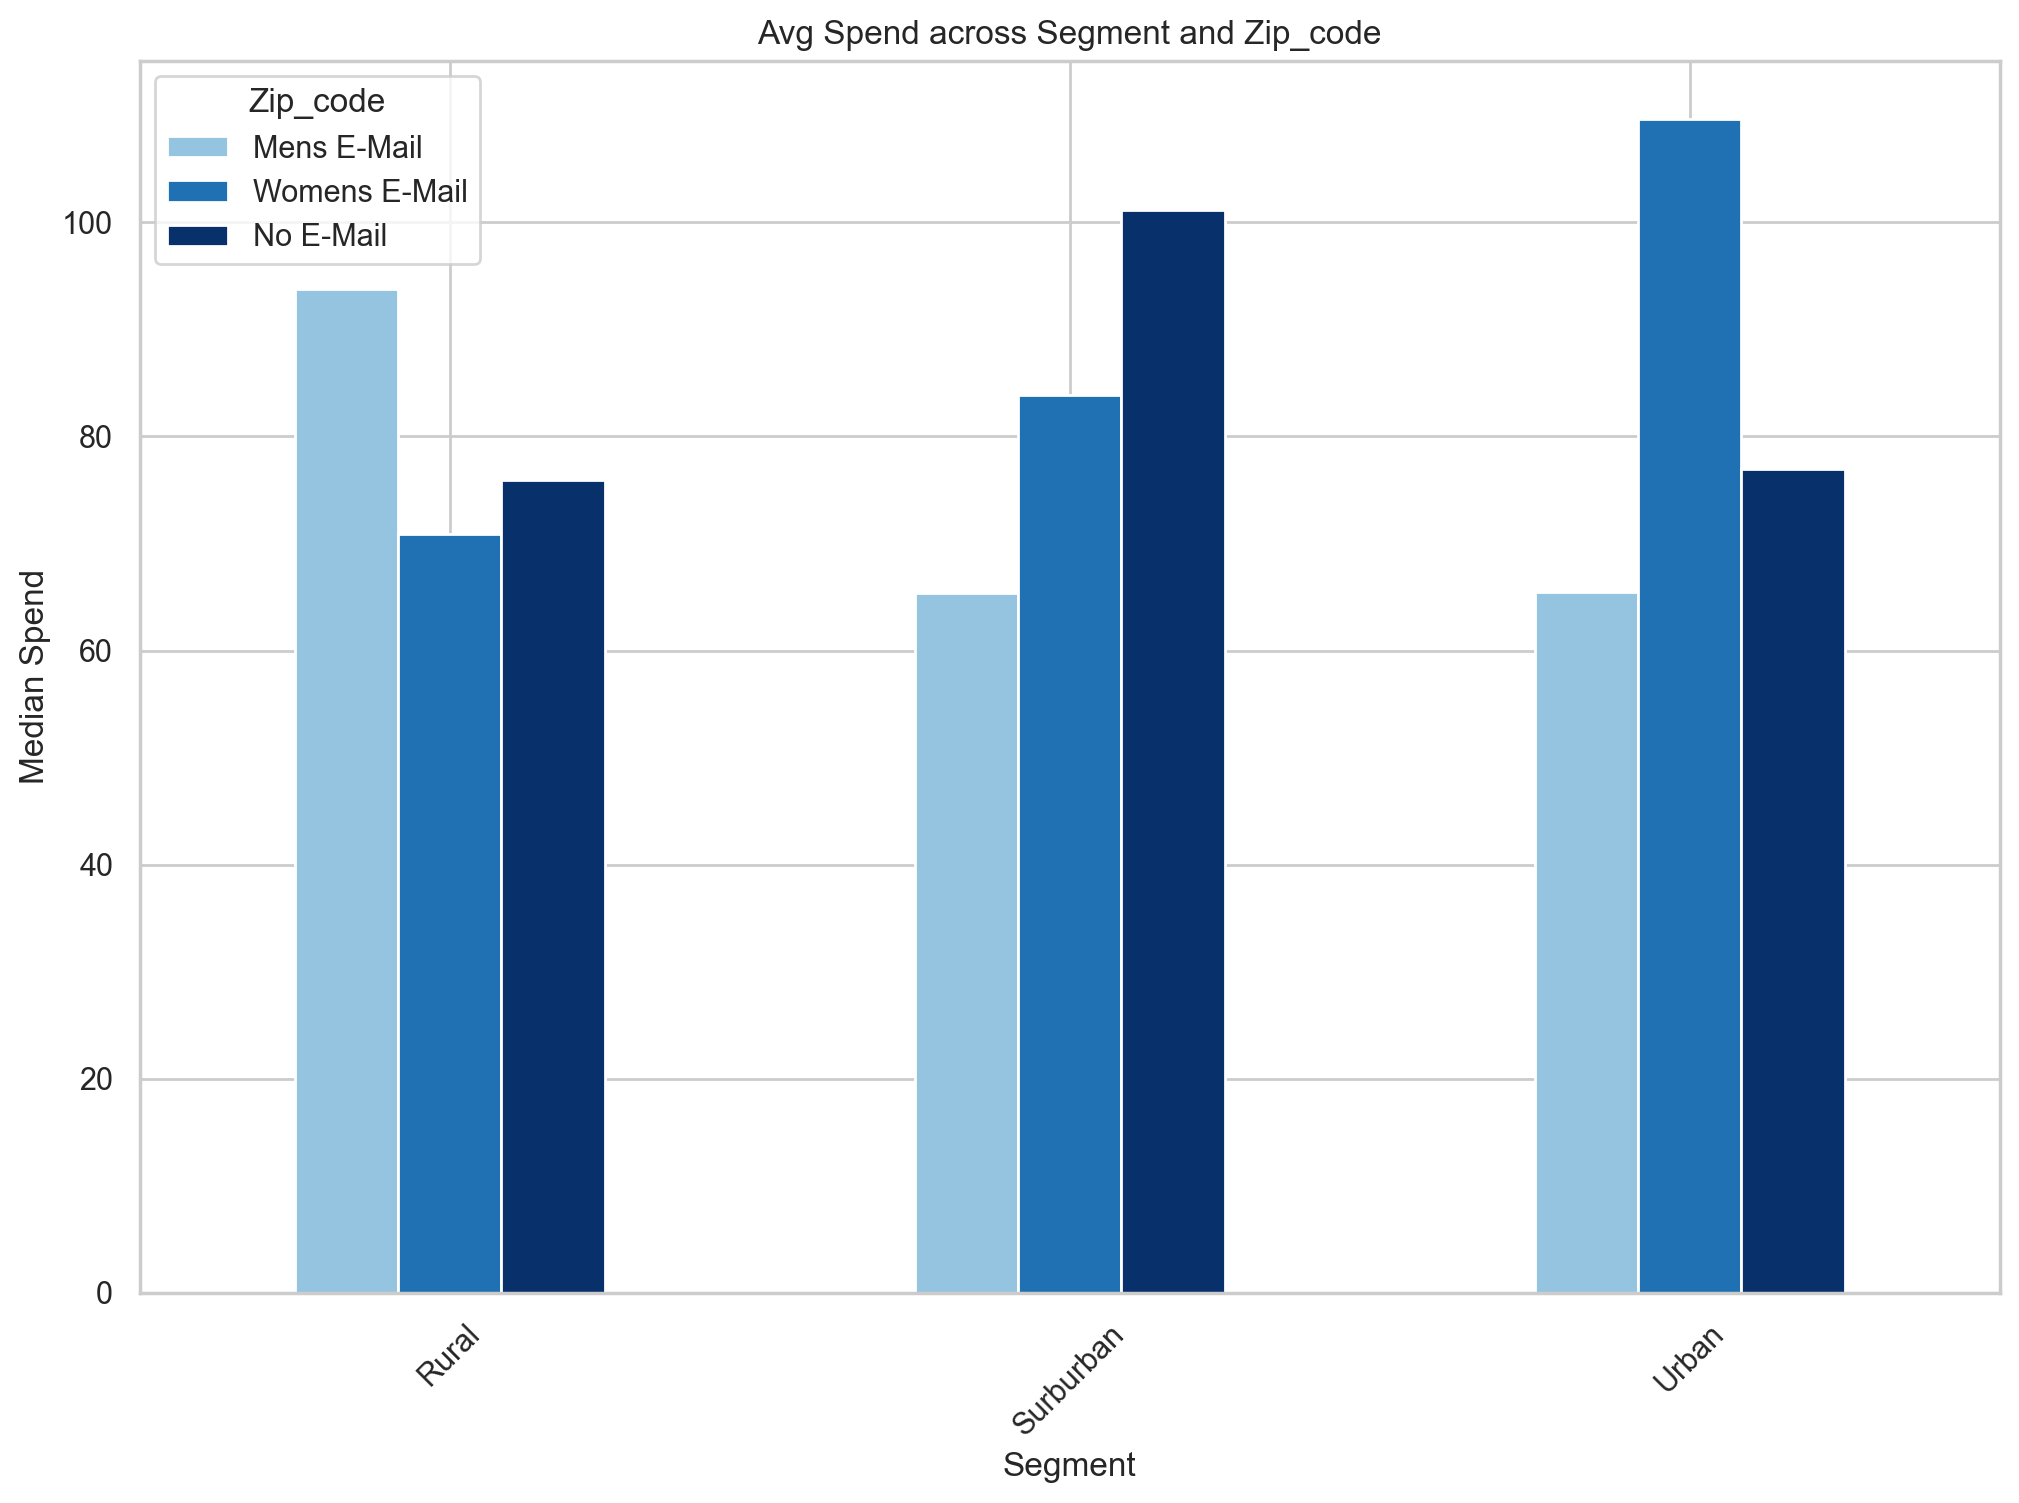

In [215]:
plot_segment_performance(df.loc[df['conversion'] == 1], 'zip_code', 'spend')

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,64000.0,5.763734,3.507592,1.00,2.00,6.00,9.0000,12.00
history,64000.0,242.085656,256.158608,29.99,64.66,158.11,325.6575,3345.93
mens,64000.0,0.551031,0.497393,0.00,0.00,1.00,1.0000,1.00
womens,64000.0,0.549719,0.497526,0.00,0.00,1.00,1.0000,1.00
newbie,64000.0,0.502250,0.499999,0.00,0.00,1.00,1.0000,1.00
visit,64000.0,0.146781,0.353890,0.00,0.00,0.00,0.0000,1.00
conversion,64000.0,0.009031,0.094604,0.00,0.00,0.00,0.0000,1.00
spend,64000.0,1.050908,15.036448,0.00,0.00,0.00,0.0000,499.00
Purchase_Ind,64000.0,1.100750,0.301000,1.00,1.00,1.00,1.0000,2.00
history_segment_ind,64000.0,2.481969,1.544514,1.00,1.00,2.00,3.0000,7.00


In [ ]:
# def visualize_segments_performance(df, segment_col, metrics):

#     segment_order = ['Mens E-Mail', 'No E-Mail', 'Womens E-Mail']
#     #subplots
#     fig, axes = plt.subplots(nrows=(len(metrics)), ncols=1, figsize=(15, 17))
#     fig.suptitle('Segment Performance Across Metrics', fontsize=16)
#     plt.subplots_adjust(hspace=0.5)

#     for i, metric in enumerate(metrics):
#         if df[metric].nunique() == 2:
#             sns.barplot(x=segment_col, y=metric, data=df, ax=axes[i], ci=None,  order=segment_order)
#             ax=axes[i].set_title(f'{metric}')
                
#         else:
#             sns.barplot(x=segment_col, y=metric, data=df.loc[df['conversion'] == 1], ax=axes[i],  ci=None, order=segment_order)
#             ax=axes[i].set_title(f'{metric}')

#         axes[i].set_xlabel(segment_col)
#         axes[i].set_ylabel(metric)

#     plt.show()  

In [162]:
def visualize_segments_performance(df, segment_col, metrics):

    segment_order = ['Mens E-Mail', 'Womens E-Mail', 'No E-Mail']
    # Subplots
    fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(15, 17))
    fig.suptitle('Segment Performance Across Metrics', fontsize=16)
    plt.subplots_adjust(hspace=0.5)

    for i, metric in enumerate(metrics):
        if df[metric].nunique() == 2:
            sns.barplot(x=segment_col, y=metric, data=df, ax=axes[i], ci=None, order=segment_order)
            axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.2%}')) 
        else:  
            sns.barplot(x=segment_col, y=metric, data=df.loc[df['conversion'] == 1], ax=axes[i], ci=None, order=segment_order)
            axes[i].yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}')) 

        # Formatting
        title = metric.capitalize()  
        axes[i].set_title(title, fontsize=20)  
        axes[i].set_xlabel(segment_col)
        axes[i].set_ylabel(f'{title}' + (' (%)' if metric in ['conversion', 'visit'] else ' ($)'))

    plt.show()


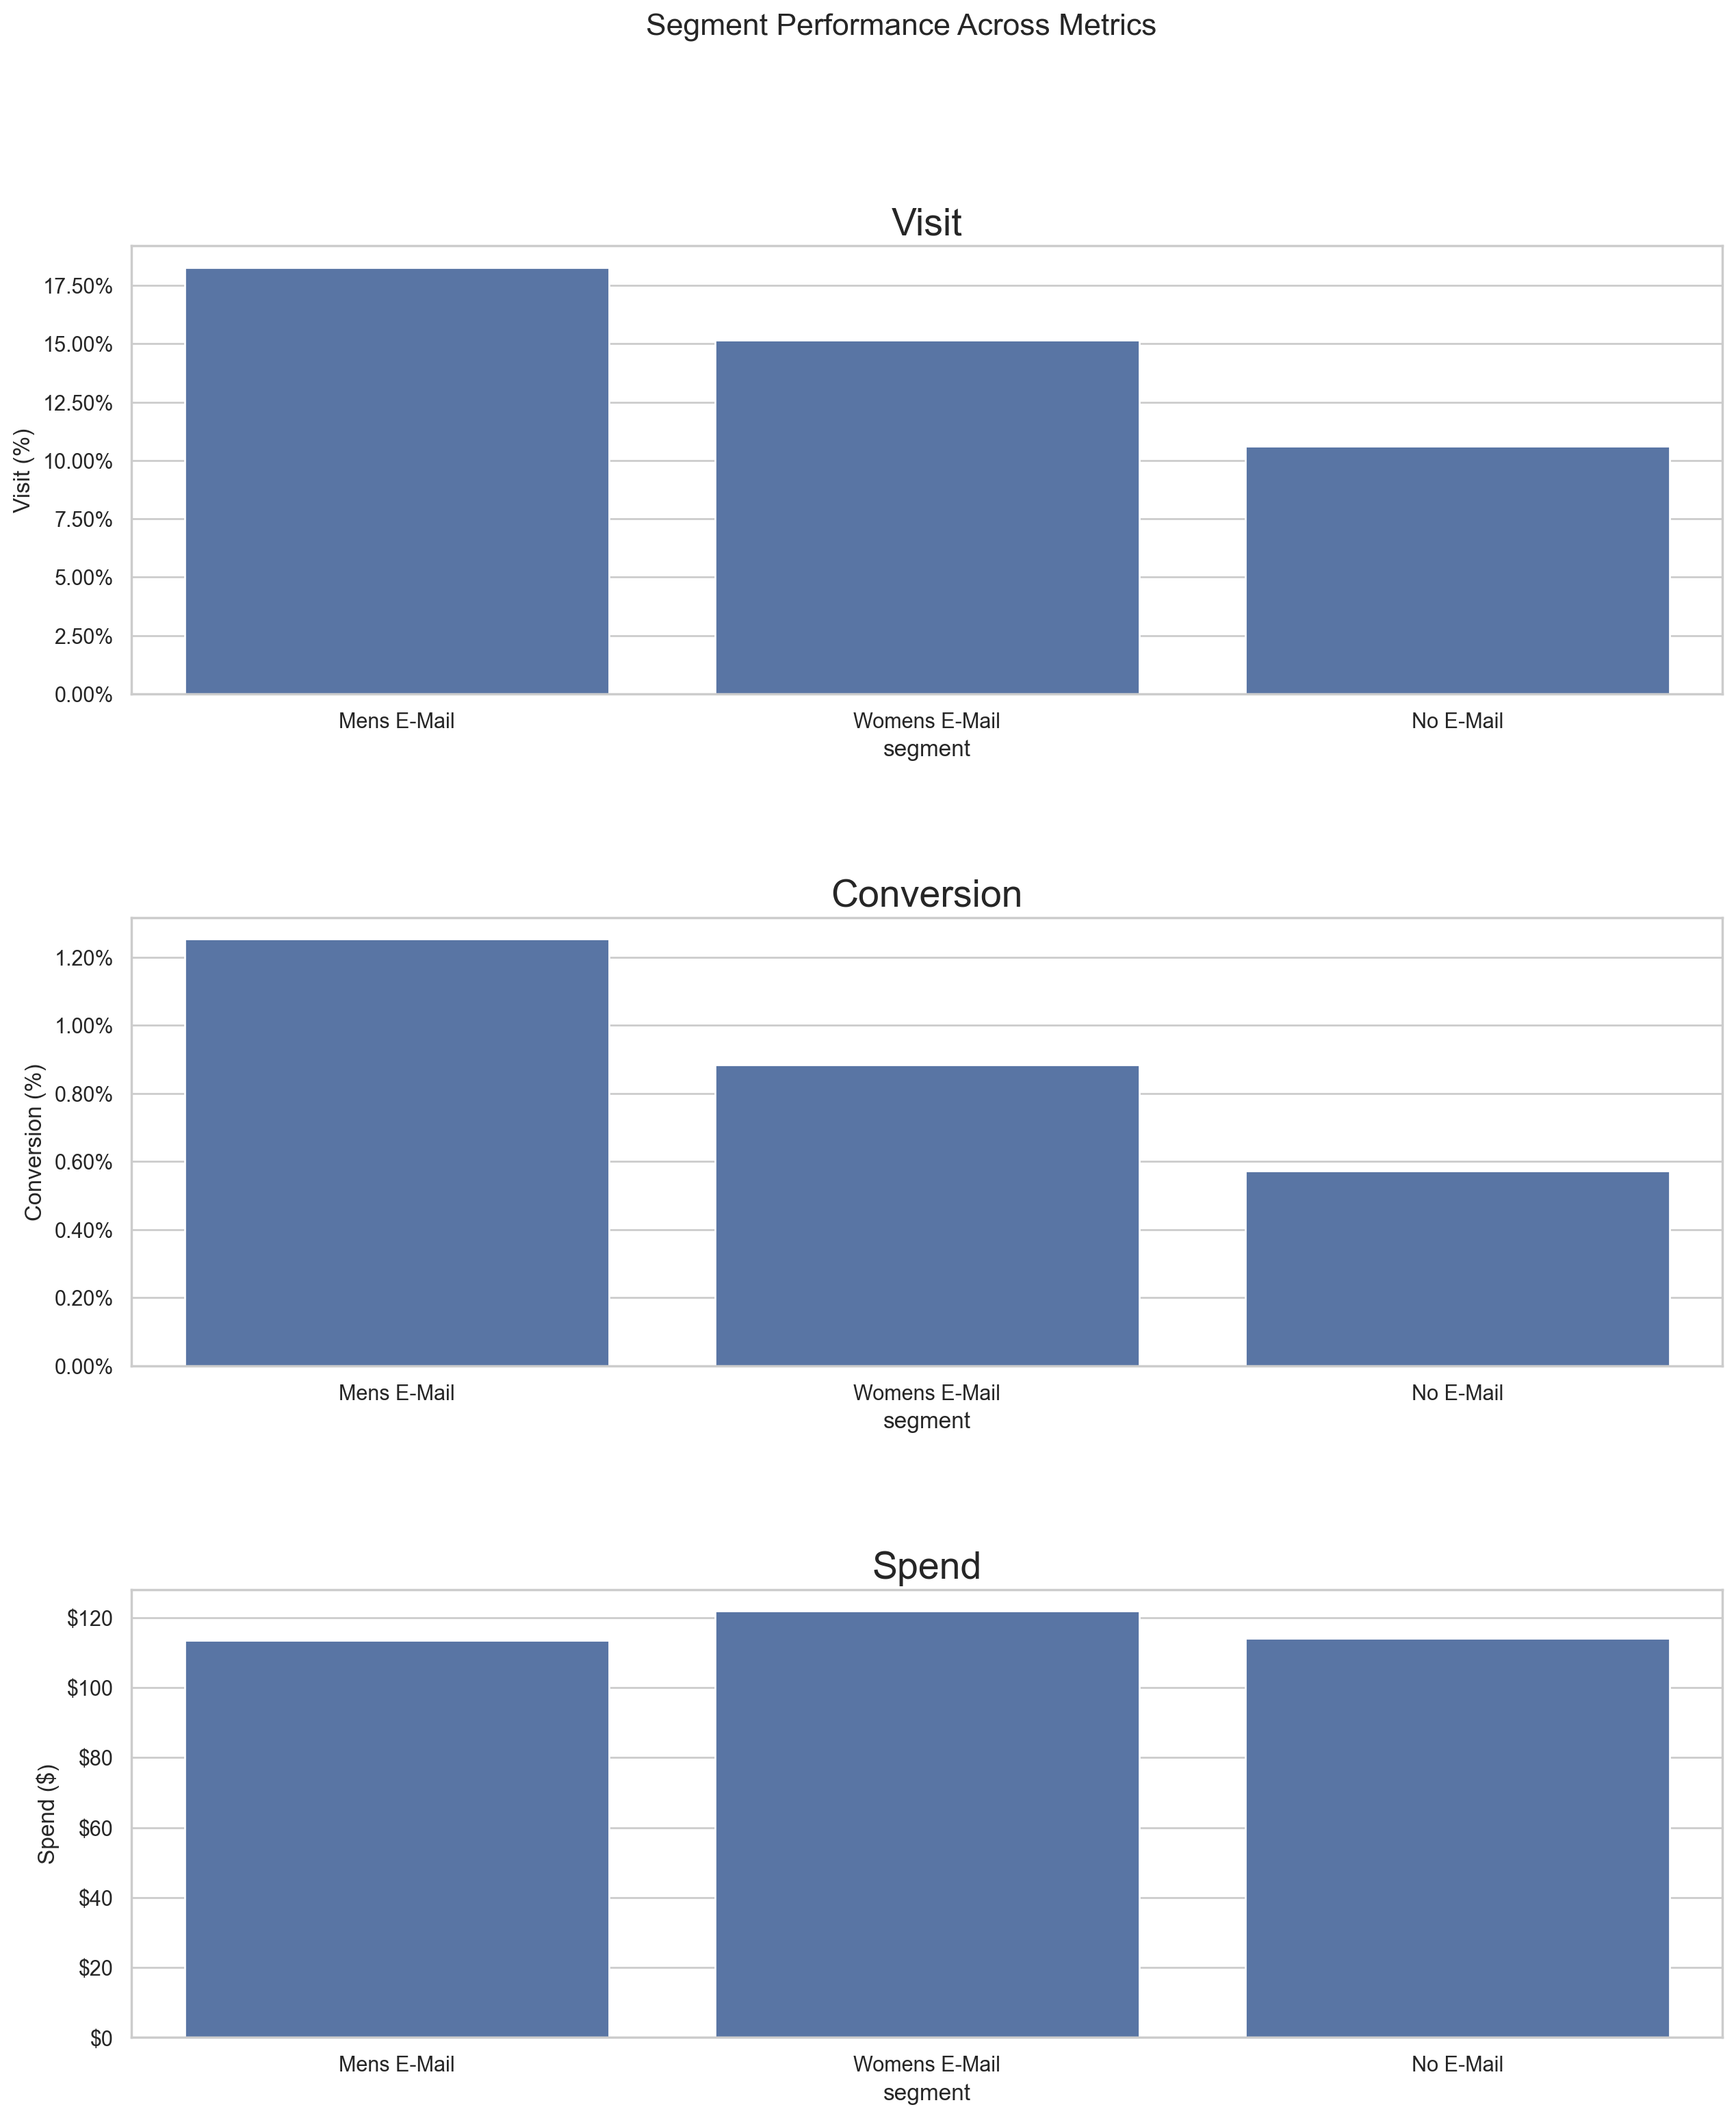

In [163]:
metrics = ['visit', 'conversion', 'spend']
segment_col = 'segment'
visualize_segments_performance(df, segment_col, metrics)

In [164]:
metrics = ['visit', 'conversion', 'spend']
segment_col = 'segment'
metric_performance_list =[]

# Loop through each metric and calculate mean performance for each segment
for metric in metrics:
    if metric == 'spend':
        mean_performance = df[df['conversion'] == 1].groupby('segment')[metric].mean()
    else:
        mean_performance = df.groupby('segment')[metric].mean()
    
    # Convert the mean performance to a DataFrame
    mean_performance_df = mean_performance.reset_index()
    mean_performance_df.columns = ['segment', f'{metric}_mean']
    
    # Format the values with appropriate symbols and decimal places
    if metric in ['visit', 'conversion']:
        mean_performance_df[f'{metric}_mean'] = mean_performance_df[f'{metric}_mean'].apply(lambda x: f'{x:.2%}')
    else:
        mean_performance_df[f'{metric}_mean'] = mean_performance_df[f'{metric}_mean'].apply(lambda x: f'${x:,.2f}')
    
    # Append the DataFrame to the list
    metric_performance_list.append(mean_performance_df)

# Merge all the metric performance DataFrames
performance_df = metric_performance_list[0]
for metric_df in metric_performance_list[1:]:
    performance_df = pd.merge(performance_df, metric_df, on='segment')


# Order the DataFrame 
segment_order = ['Mens E-Mail', 'Womens E-Mail', 'No E-Mail'] 
performance_df['segment'] = pd.Categorical(performance_df['segment'], categories=segment_order, ordered=True) 
performance_df = performance_df.sort_values('segment')
performance_df

,segment,visit_mean,conversion_mean,spend_mean
0,Mens E-Mail,18.28%,1.25%,$113.53
2,Womens E-Mail,15.14%,0.88%,$121.89
1,No E-Mail,10.62%,0.57%,$114.00


In [173]:

# Calculate conversion rates
conversion_rates = df.groupby('segment')['conversion'].mean()
conversion_rates

# Calculate average spend per conversion for each segment
avg_spend_per_conversion = df[df['conversion'] == 1].groupby('segment')['spend'].mean()
avg_spend_per_conversion

# Calculate incremental sales compared to the control group
control_conversion_rate = conversion_rates['No E-Mail']
control_conversion_rate
control_avg_spend = avg_spend_per_conversion['No E-Mail']
control_avg_spend


# Calculate lift for conversion rates
lift_conversion_rate = (conversion_rates - control_conversion_rate) / control_conversion_rate * 100

# Summarize results
summary_df = pd.DataFrame({
    'conversion_rate': conversion_rates.apply(lambda x: f'{x:.2%}'),
    'lift_conversion_rate': lift_conversion_rate.apply(lambda x: f'{x:.2f}%')
})

print("Summary of Incremental Sales and Lift:")
print(summary_df)


segment
Mens E-Mail      0.012531
No E-Mail        0.005726
Womens E-Mail    0.008837
Name: conversion, dtype: float64

segment
Mens E-Mail      113.526929
No E-Mail        114.002705
Womens E-Mail    121.894762
Name: spend, dtype: float64

0.005726086548390125

114.00270491803279

Summary of Incremental Sales and Lift:
              conversion_rate lift_conversion_rate
segment                                           
Mens E-Mail             1.25%              118.84%
No E-Mail               0.57%                0.00%
Womens E-Mail           0.88%               54.33%


# Statistical Significance on Campaign Results 

### Visits

In [31]:
visit_rates = df.groupby('segment')['visit']
visit_rates

std_p = lambda x: np.std(x, ddof=0)
se_p = lambda x: stats.sem(x, ddof=0)

visit_rates = visit_rates.agg([np.mean, std_p, se_p])
visit_rates.columns = ['visit_rates', 'std_deviation', 'std_error']
visit_rates
round(visit_rates, 3)

,visit_rates,std_deviation,std_error
segment,,,
Mens E-Mail,0.182757,0.386467,0.002648
No E-Mail,0.106167,0.308052,0.002110
Womens E-Mail,0.151400,0.358439,0.002451


,visit_rates,std_deviation,std_error
segment,,,
Mens E-Mail,0.183,0.386,0.003
No E-Mail,0.106,0.308,0.002
Womens E-Mail,0.151,0.358,0.002


In [248]:
mens_email_visit = df[df['segment'] == 'Mens E-Mail']['visit']
womens_email_visit = df[df['segment'] == 'Womens E-Mail']['visit']
no_email_visit = df[df['segment'] == 'No E-Mail']['visit']

# Perform ANOVA -- to test if there is a statistically significant difference between the mean visit of three groups
f_stat, p_val = stats.f_oneway(mens_email_visit, womens_email_visit, no_email_visit)
print(f'ANOVA p-value: {p_val:.5f}')

ANOVA p-value: 0.00000


In [234]:
# Perform t-tests
t_stat_men_vs_no, p_val_men_vs_no = stats.ttest_ind(mens_email_visit, no_email_visit)
t_stat_women_vs_no, p_val_women_vs_no = stats.ttest_ind(womens_email_visit, no_email_visit)
t_stat_men_vs_women, p_val_men_vs_women = stats.ttest_ind(mens_email_visit, womens_email_visit)

# Bonferroni correction (reduce the risk of Type I errors (false positives) when multiple comparisons are being conducted)
p_val_men_vs_women_corrected = p_val_men_vs_women * 3
p_val_men_vs_no_corrected = p_val_men_vs_no * 3
p_val_women_vs_no_corrected = p_val_women_vs_no * 3

print('Corrected p-values using Bonferroni Correction:')
print(f'Mens email vs No emails T-test p-value: {p_val_men_vs_no_corrected:.5f}')
print(f'Womens email vs No emails T-test p-value: {p_val_women_vs_no_corrected:.5f}')
print(f'Mens email vs Womens email T-test p-value: {p_val_men_vs_women_corrected:.5f}')

Corrected p-values using Bonferroni Correction:
Mens email vs No emails T-test p-value: 0.00000
Womens email vs No emails T-test p-value: 0.00000
Mens email vs Womens email T-test p-value: 0.00000


In [34]:
df.segment.value_counts()

segment
Womens E-Mail    21387
Mens E-Mail      21307
No E-Mail        21306
Name: count, dtype: int64

In [35]:
# Count number of success for each group
success_mens = df[df['segment'] == 'Mens E-Mail']['visit'].sum()  
total_mens = df[df['segment'] == 'Mens E-Mail']['visit'].count()  
success_womens = df[df['segment'] == 'Womens E-Mail']['visit'].sum() 
total_womens = df[df['segment'] == 'Womens E-Mail']['visit'].count()  
success_control = df[df['segment'] == 'No E-Mail']['visit'].sum() 
total_control = df[df['segment'] == 'No E-Mail']['visit'].count()   

# Calculate proportions for each group
p_mens = success_mens / total_mens
p_womens = success_womens / total_womens
p_control = success_control / total_control

# Function to perform Z-test for proportions with confidence intervals
def z_test_proportions(success_a, total_a, success_b, total_b, alpha=0.05):
    p1 = success_a / total_a
    p2 = success_b / total_b
    p_pool = (success_a + success_b) / (total_a + total_b)
    se = np.sqrt(p_pool * (1 - p_pool) * (1 / total_a + 1 / total_b))
    z_stat = (p1 - p2) / se
    p_val = 2 * norm.cdf(-abs(z_stat))  # Two-tailed test
    
    # Calculate confidence interval
    margin_of_error = se * norm.ppf(1 - alpha/2)
    conf_interval = ((p1 - p2) - margin_of_error, (p1 - p2) + margin_of_error)
    
    return z_stat, p_val, conf_interval

# Perform Z-tests for each pair of groups
z_stat_men_vs_women, p_val_men_vs_women, conf_int_men_vs_women = z_test_proportions(success_mens, total_mens, success_womens, total_womens)
z_stat_men_vs_control, p_val_men_vs_control, conf_int_men_vs_control = z_test_proportions(success_mens, total_mens, success_control, total_control)
z_stat_women_vs_control, p_val_women_vs_control, conf_int_women_vs_control = z_test_proportions(success_womens, total_womens, success_control, total_control)

# Apply Bonferroni correction
num_tests = 3
p_val_men_vs_women_corrected = min(p_val_men_vs_women * num_tests, 1)  # Ensure p-value does not exceed 1
p_val_men_vs_control_corrected = min(p_val_men_vs_control * num_tests, 1)
p_val_women_vs_control_corrected = min(p_val_women_vs_control * num_tests, 1)

# Print results
print('Corrected p-values using Bonferroni Correction:')
print(f'Mens vs Womens Z-test p-value: {p_val_men_vs_women_corrected:.5f}, Confidence Interval: {conf_int_men_vs_women}')
print(f'Mens vs Control Z-test p-value: {p_val_men_vs_control_corrected:.5f}, Confidence Interval: {conf_int_men_vs_control}')
print(f'Womens vs Control Z-test p-value: {p_val_women_vs_control_corrected:.5f}, Confidence Interval: {conf_int_women_vs_control}')

Corrected p-values using Bonferroni Correction:
Mens vs Womens Z-test p-value: 0.00000, Confidence Interval: (0.024279813257407856, 0.038433100871548664)
Mens vs Control Z-test p-value: 0.00000, Confidence Interval: (0.06991374252756064, 0.08326538477550186)
Womens vs Control Z-test p-value: 0.00000, Confidence Interval: (0.03887751753773743, 0.05158869563636854)


### Conversion

In [36]:
conversion_rates = df.groupby('segment')['conversion']
conversion_rates

std_p = lambda x: np.std(x, ddof=0)
se_p = lambda x: stats.sem(x, ddof=0)

conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error']
conversion_rates
round(conversion_rates, 3)

,conversion_rate,std_deviation,std_error
segment,,,
Mens E-Mail,0.012531,0.111239,0.000762
No E-Mail,0.005726,0.075454,0.000517
Womens E-Mail,0.008837,0.093590,0.000640


,conversion_rate,std_deviation,std_error
segment,,,
Mens E-Mail,0.013,0.111,0.001
No E-Mail,0.006,0.075,0.001
Womens E-Mail,0.009,0.094,0.001


In [37]:
mens_email = df[df['segment'] == 'Mens E-Mail']['conversion']
womens_email = df[df['segment'] == 'Womens E-Mail']['conversion']
no_email = df[df['segment'] == 'No E-Mail']['conversion']


# Perform ANOVA
f_stat, p_val = stats.f_oneway(womens_email, mens_email, no_email)
print('ANOVA F-statistic:', f_stat)
print('ANOVA p-value:', p_val)

ANOVA F-statistic: 27.65159943733394
ANOVA p-value: 9.91399603003993e-13


In [38]:
# Perform t-tests
t_stat_men_vs_women, p_val_men_vs_women = stats.ttest_ind(mens_email, womens_email)
t_stat_men_vs_no, p_val_men_vs_no = stats.ttest_ind(mens_email, no_email)
t_stat_women_vs_no, p_val_women_vs_no = stats.ttest_ind(womens_email, no_email)

# Number of comparisons
num_tests = 3

# Bonferroni correction (reduce the risk of Type I errors (false positives) when multiple comparisons are being conducted)
p_val_men_vs_women_corrected = p_val_men_vs_women * num_tests
p_val_men_vs_no_corrected = p_val_men_vs_no * num_tests
p_val_women_vs_no_corrected = p_val_women_vs_no * num_tests

# Print results
print('Corrected p-values using Bonferroni Correction:')
print(f'Mens email vs Womens email T-test p-value: {p_val_men_vs_women_corrected:.5f}')
print(f'Mens email vs No emails T-test p-value: {p_val_men_vs_no_corrected:.5f}')
print(f'Womens email vs No emails T-test p-value: {p_val_women_vs_no_corrected:.5f}')


Corrected p-values using Bonferroni Correction:
Mens email vs Womens email T-test p-value: 0.00061
Mens email vs No emails T-test p-value: 0.00000
Womens email vs No emails T-test p-value: 0.00047


In [39]:
# Count number of success for each group
success_mens = df[df['segment'] == 'Mens E-Mail']['conversion'].sum()  
total_mens = df[df['segment'] == 'Mens E-Mail']['conversion'].count()  
success_womens = df[df['segment'] == 'Womens E-Mail']['conversion'].sum() 
total_womens = df[df['segment'] == 'Womens E-Mail']['conversion'].count()  
success_control = df[df['segment'] == 'No E-Mail']['conversion'].sum() 
total_control = df[df['segment'] == 'No E-Mail']['conversion'].count()   

# Calculate proportions for each group
p_mens = success_mens / total_mens
p_womens = success_womens / total_womens
p_control = success_control / total_control

# Function to perform Z-test for proportions with confidence intervals
def z_test_proportions(success_a, total_a, success_b, total_b, alpha=0.05):
    p1 = success_a / total_a
    p2 = success_b / total_b
    p_pool = (success_a + success_b) / (total_a + total_b)
    se = np.sqrt(p_pool * (1 - p_pool) * (1 / total_a + 1 / total_b))
    z_stat = (p1 - p2) / se
    p_val = 2 * norm.cdf(-abs(z_stat))  # Two-tailed test
    
    # Calculate confidence interval
    margin_of_error = se * norm.ppf(1 - alpha/2)
    conf_interval = ((p1 - p2) - margin_of_error, (p1 - p2) + margin_of_error)
    
    return z_stat, p_val, conf_interval

# Perform Z-tests for each pair of groups
z_stat_men_vs_women, p_val_men_vs_women, conf_int_men_vs_women = z_test_proportions(success_mens, total_mens, success_womens, total_womens)
z_stat_men_vs_control, p_val_men_vs_control, conf_int_men_vs_control = z_test_proportions(success_mens, total_mens, success_control, total_control)
z_stat_women_vs_control, p_val_women_vs_control, conf_int_women_vs_control = z_test_proportions(success_womens, total_womens, success_control, total_control)

# Apply Bonferroni correction
num_tests = 3
p_val_men_vs_women_corrected = min(p_val_men_vs_women * num_tests, 1)  # Ensure p-value does not exceed 1
p_val_men_vs_control_corrected = min(p_val_men_vs_control * num_tests, 1)
p_val_women_vs_control_corrected = min(p_val_women_vs_control * num_tests, 1)

# Print results
print('Corrected p-values using Bonferroni Correction:')
print(f'Mens vs Womens Z-test p-value: {p_val_men_vs_women_corrected:.5f}, Confidence Interval: {conf_int_men_vs_women}')
print(f'Mens vs Control Z-test p-value: {p_val_men_vs_control_corrected:.5f}, Confidence Interval: {conf_int_men_vs_control}')
print(f'Womens vs Control Z-test p-value: {p_val_women_vs_control_corrected:.5f}, Confidence Interval: {conf_int_women_vs_control}')


Corrected p-values using Bonferroni Correction:
Mens vs Womens Z-test p-value: 0.00062, Confidence Interval: (0.001743822998708508, 0.005644075018352366)
Mens vs Control Z-test p-value: 0.00000, Confidence Interval: (0.0049989996047769755, 0.008611013434454414)
Womens vs Control Z-test p-value: 0.00047, Confidence Interval: (0.0014977588389005383, 0.004724356183269977)


### Spend

In [58]:
df

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,Purchase_Ind,history_segment_ind,R_recency,M_history_Spend,F_frequency_visit,RFM_score
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,1,2,2,2,1,5
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,2,3,3,4,1,8
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,1,2,2,3,1,6
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,1,5,2,5,1,8
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,1,1,4,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,10,2) $100 - $200,105.54,1,0,Urban,0,Web,Mens E-Mail,0,0,0.0,1,2,2,2,1,5
63996,5,1) $0 - $100,38.91,0,1,Urban,1,Phone,Mens E-Mail,0,0,0.0,1,1,3,1,1,5
63997,6,1) $0 - $100,29.99,1,0,Urban,1,Phone,Mens E-Mail,0,0,0.0,1,1,3,1,1,5
63998,1,5) $500 - $750,552.94,1,0,Surburban,1,Multichannel,Womens E-Mail,0,0,0.0,1,5,5,5,1,11


### Incremental sales & Impact

In [77]:
avg_spend_mens = df[df['segment'] == 'Mens E-Mail'][df['conversion'] == 1]['spend'].mean()
avg_spend_mens
avg_spend_no_email = df[df['segment'] == 'No E-Mail'][df['conversion'] == 1]['spend'].mean()
avg_spend_no_email
avg_spend_womens = df[df['segment'] == 'Womens E-Mail'][df['conversion'] == 1]['spend'].mean()
avg_spend_womens


mens_email = df[df['segment'] == 'Mens E-Mail']['conversion'].mean()
mens_email

no_email = df[df['segment'] == 'No E-Mail']['conversion'].mean()
no_email

womens_email = df[df['segment'] == 'Womens E-Mail']['conversion'].mean()
womens_email

113.52692883895132

114.00270491803279

121.8947619047619

0.01253109306800582

0.005726086548390125

0.008837144059475383

In [102]:
incremental_sales_mens = avg_spend_mens - avg_spend_no_email
incremental_sales_womens = avg_spend_womens - avg_spend_no_email

print('Incremental Sales - Mens Email:', incremental_sales_mens)
print('Incremental Sales - Womens Email:', incremental_sales_womens)

Incremental Sales - Mens Email: -0.47577607908147
Incremental Sales - Womens Email: 7.892056986729116


In [80]:
avg_spend_mens * mens_email

1.422616511005773

In [85]:
mens_incremental_sales = (avg_spend_mens * mens_email) - (avg_spend_no_email * no_email) 
mens_incremental_sales

womens_incremental_sales = (avg_spend_womens * womens_email) - (avg_spend_no_email * no_email) 
womens_incremental_sales

0.7698271558945367

0.4244122159365966

In [94]:
mens_incremental_sales * 21307
df.segment.value_counts()

16402.707210644894

segment
Womens E-Mail    21387
Mens E-Mail      21307
No E-Mail        21306
Name: count, dtype: int64

In [95]:
womens_incremental_sales * 21387

9076.904062235992

In [91]:
df.groupby('segment')['spend'].sum()
df.spend.sum()

segment
Mens E-Mail      30311.69
No E-Mail        13908.33
Womens E-Mail    23038.11
Name: spend, dtype: float64

67258.12999999999

# Leads Targeting (to which audience would you target the Men’s E-mail and the Women’s E-mail? If you could only send an e-mail campaign to 10,000 customers, who would receive which e-mail? Why?)

### Recency/Frequency(purchase_ind)/ Montary value 

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,64000.0,5.763734,3.507592,1.00,2.00,6.00,9.0000,12.00
history,64000.0,242.085656,256.158608,29.99,64.66,158.11,325.6575,3345.93
mens,64000.0,0.551031,0.497393,0.00,0.00,1.00,1.0000,1.00
womens,64000.0,0.549719,0.497526,0.00,0.00,1.00,1.0000,1.00
newbie,64000.0,0.502250,0.499999,0.00,0.00,1.00,1.0000,1.00
visit,64000.0,0.146781,0.353890,0.00,0.00,0.00,0.0000,1.00
conversion,64000.0,0.009031,0.094604,0.00,0.00,0.00,0.0000,1.00
spend,64000.0,1.050908,15.036448,0.00,0.00,0.00,0.0000,499.00
Purchase_Ind,64000.0,1.100750,0.301000,1.00,1.00,1.00,1.0000,2.00
history_segment_ind,64000.0,2.481969,1.544514,1.00,1.00,2.00,3.0000,7.00


In [44]:
df

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,Purchase_Ind,history_segment_ind
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,1,2
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,2,3
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,1,2
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,1,5
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63995,10,2) $100 - $200,105.54,1,0,Urban,0,Web,Mens E-Mail,0,0,0.0,1,2
63996,5,1) $0 - $100,38.91,0,1,Urban,1,Phone,Mens E-Mail,0,0,0.0,1,1
63997,6,1) $0 - $100,29.99,1,0,Urban,1,Phone,Mens E-Mail,0,0,0.0,1,1
63998,1,5) $500 - $750,552.94,1,0,Surburban,1,Multichannel,Womens E-Mail,0,0,0.0,1,5


<Axes: xlabel='recency', ylabel='count'>

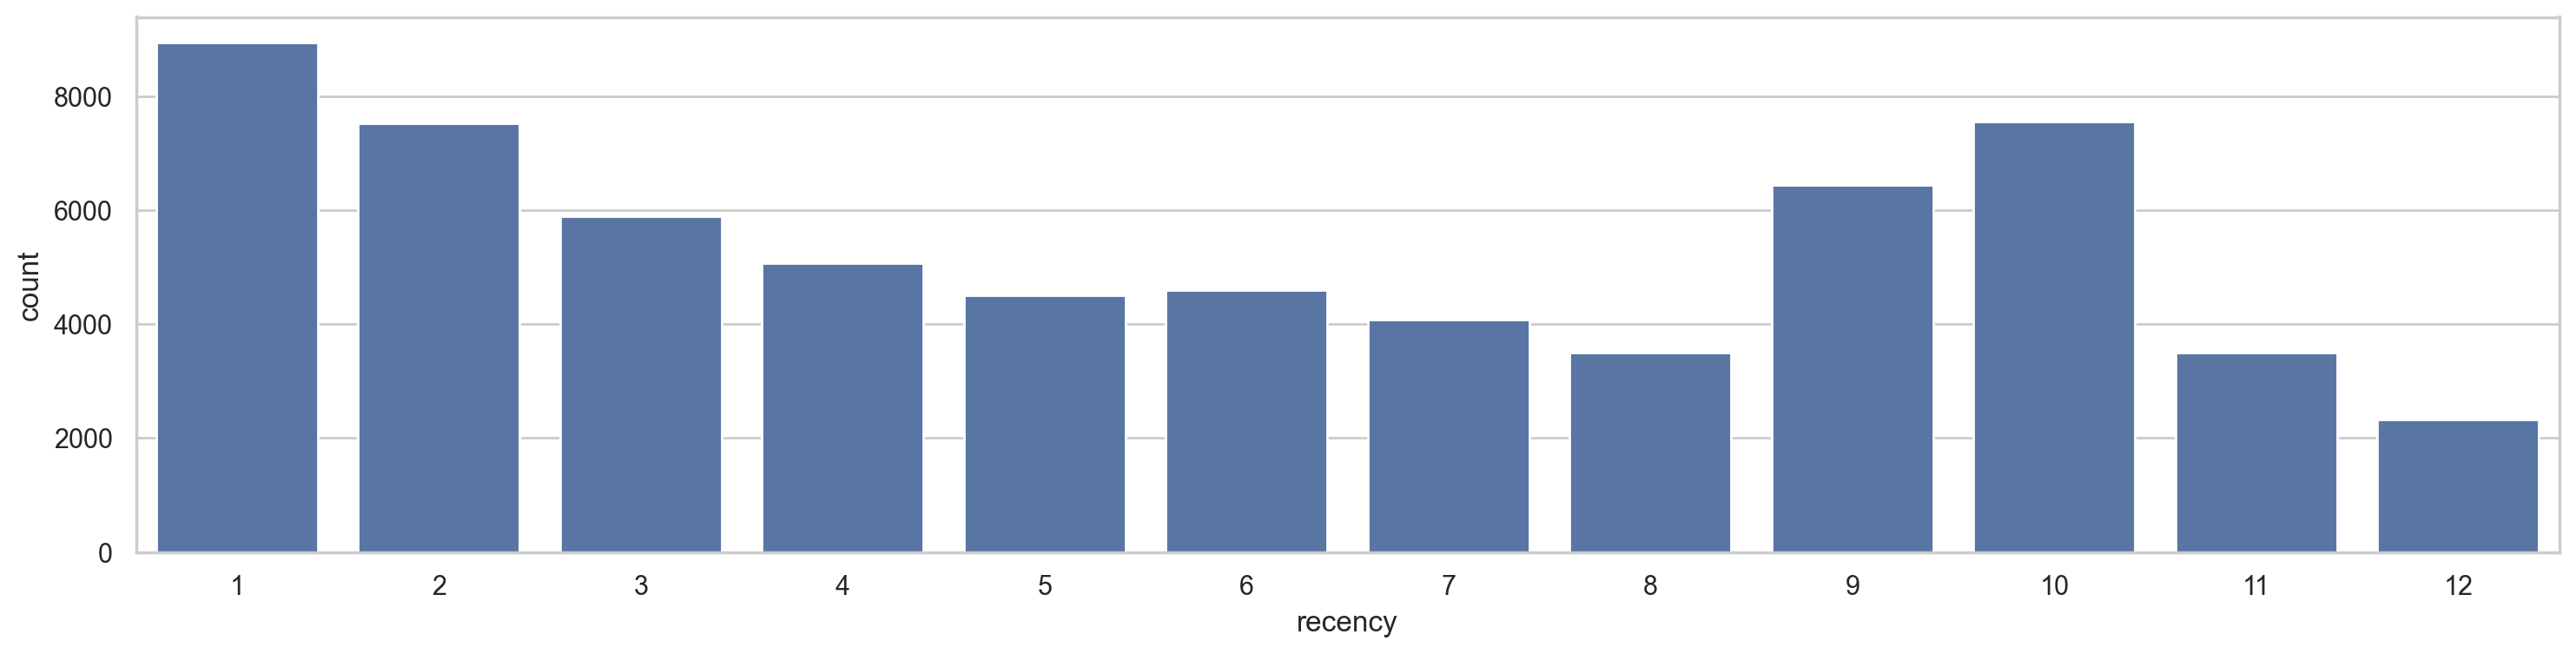

In [45]:
sorted_recency_values = sorted(df['recency'])
sns.countplot(x='recency', data=df,  order =sorted_recency_values)

<Axes: xlabel='history', ylabel='Count'>

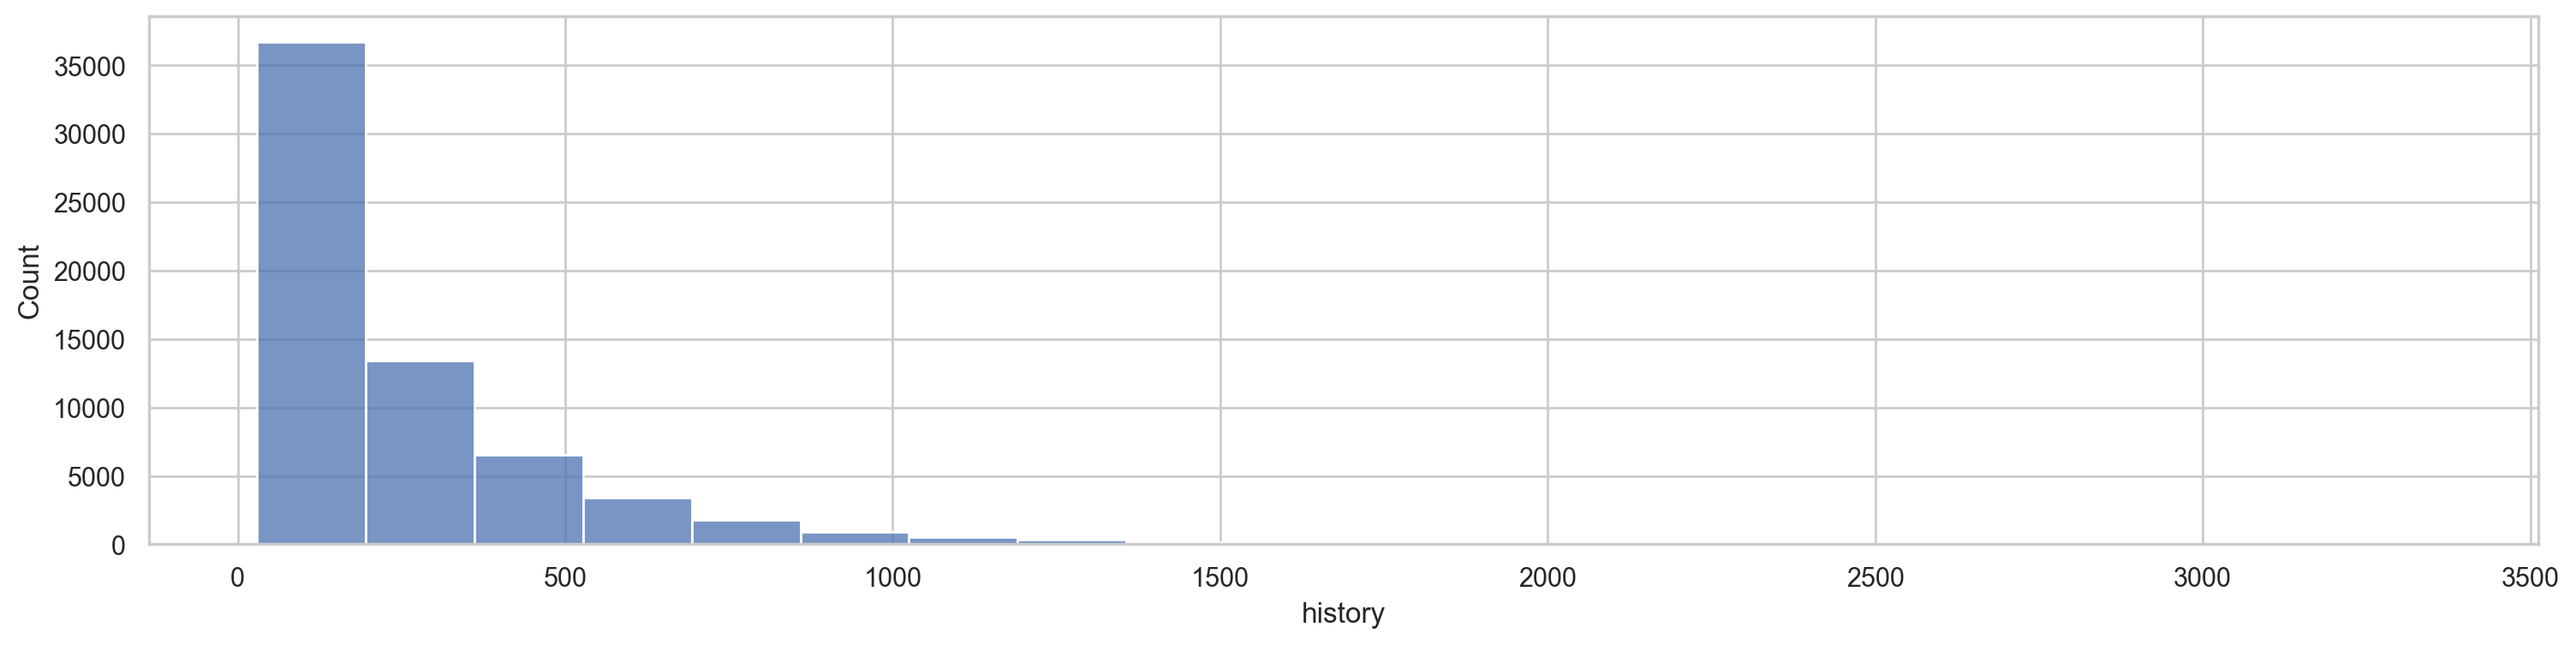

In [46]:
sns.histplot(x='history', data=df, bins=20)

# # plt.figure(figsize=(6, 14))
# sns.displot(x=df['history'], kde=True, data=df)
# # plt.show()


In [47]:
# Pairplot to visualize relationships
# sns.pairplot(df, vars=['recency', 'history', 'visit'], hue='visit')
# plt.show()


## Recency

R_recency
2    21579
3    14192
4    13441
5     8952
1     5836
Name: count, dtype: int64

64000

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,Purchase_Ind,history_segment_ind,R_recency
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,1,2,2
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,2,3,3
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,1,2,2
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,1,5,2
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,1,1,4
5,6,2) $100 - $200,134.83,0,1,Surburban,0,Phone,Womens E-Mail,1,0,0.0,1,2,3
6,9,3) $200 - $350,280.20,1,0,Surburban,1,Phone,Womens E-Mail,0,0,0.0,1,3,2
7,9,1) $0 - $100,46.42,0,1,Urban,0,Phone,Womens E-Mail,0,0,0.0,1,1,2
8,9,5) $500 - $750,675.07,1,1,Rural,1,Phone,Mens E-Mail,0,0,0.0,2,5,2
9,10,1) $0 - $100,32.84,0,1,Urban,1,Web,Womens E-Mail,0,0,0.0,1,1,2


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='R_recency', ylabel='count'>

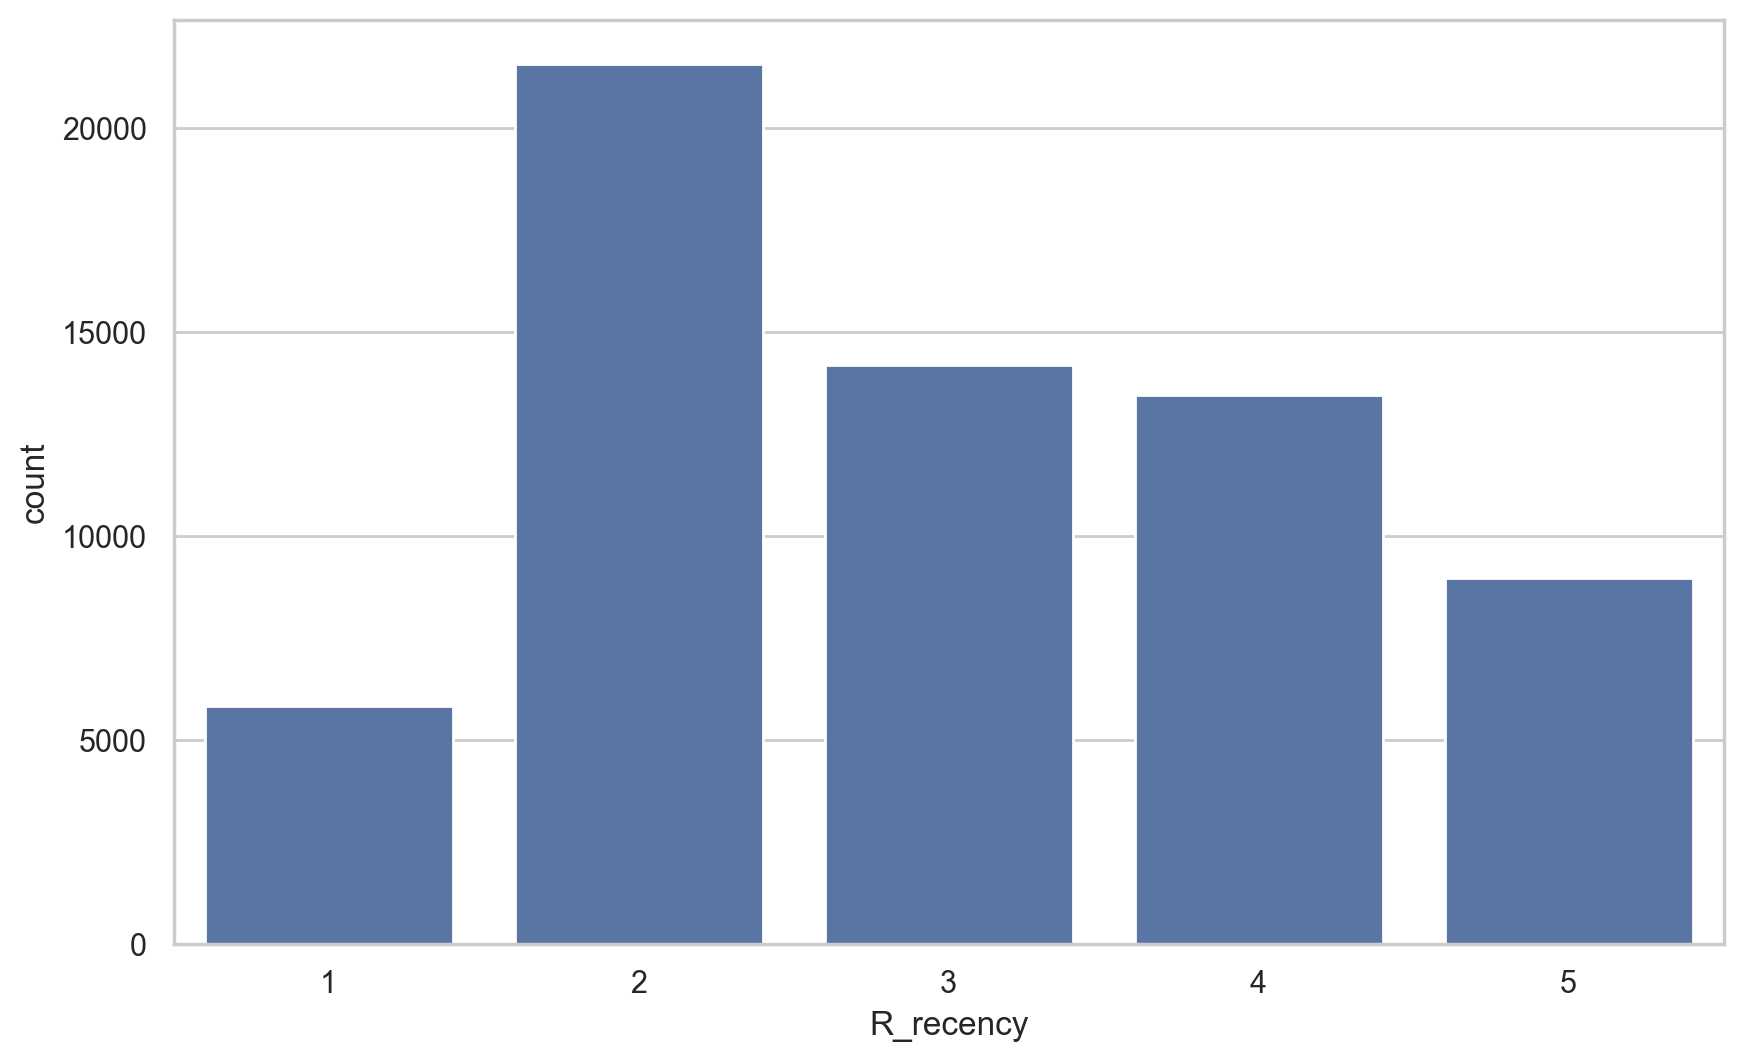

In [48]:
bin_edge = [0, 1, 3, 6, 10, 12]
df['R_recency'] = pd.cut(df['recency'], bins=bin_edge, labels=[5, 4, 3, 2, 1], duplicates='drop')
df['R_recency'].value_counts()
df['R_recency'].count()
df.head(20)


sorted_rrecency_values = sorted(df['R_recency'])
plt.figure(figsize=(10, 6))
sns.countplot(x='R_recency', data=df,  order = sorted_rrecency_values)
plt.show()

## Monetary

history_segment
1) $0 - $100        22970
2) $100 - $200      14254
3) $200 - $350      12289
4) $350 - $500       6409
5) $500 - $750       4911
6) $750 - $1,000     1859
7) $1,000 +          1308
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='history_segment_ind', ylabel='count'>

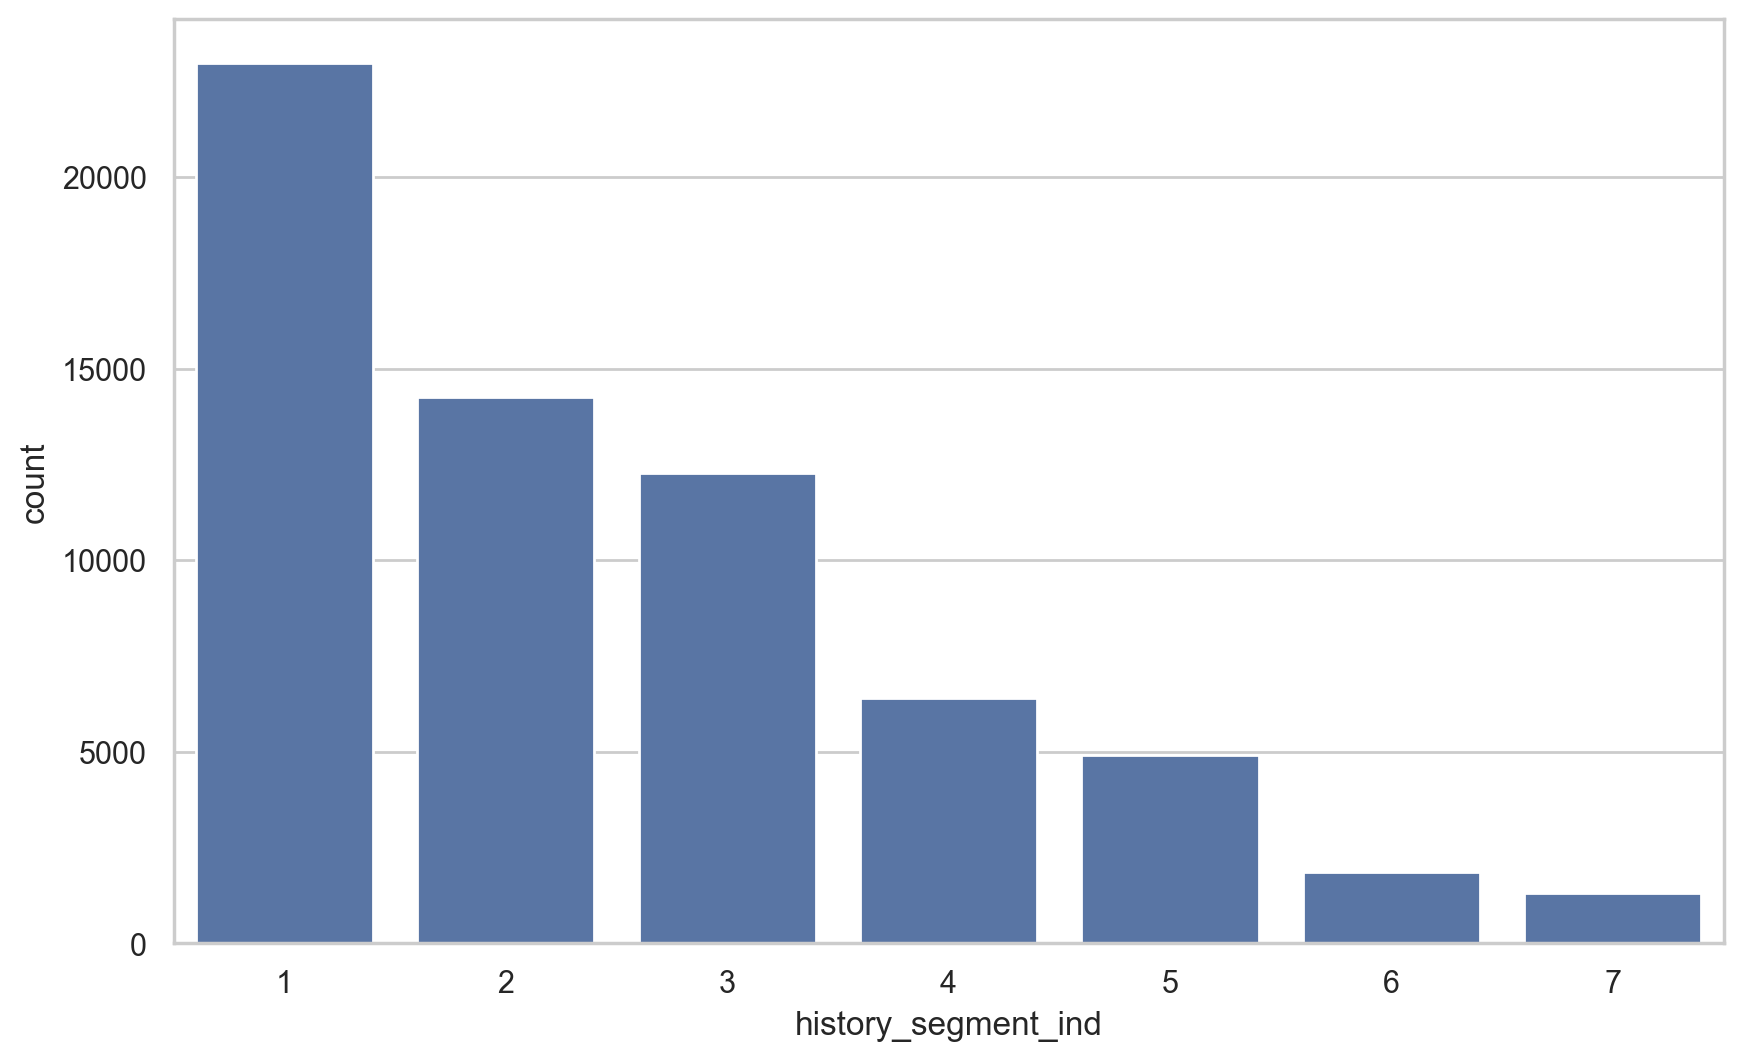

In [49]:
df.history_segment.value_counts()
# plt.figure(figsize=(10, 6))
# sns.countplot(x='history_segment', data=df,  order = df['history_segment'].value_counts().index)
# plt.show()

sorted_m_values = sorted(df['history_segment_ind'])
plt.figure(figsize=(10, 6))
sns.countplot(x='history_segment_ind', data=df,  order = sorted_m_values)
plt.show()

In [50]:
df.history.describe().T

count    64000.000000
mean       242.085656
std        256.158608
min         29.990000
25%         64.660000
50%        158.110000
75%        325.657500
max       3345.930000
Name: history, dtype: float64

In [51]:
# bin_edge = [0, 2, 3, 4, 6, 7]
# df['M_history_Spend_1'] = pd.cut(df['history_segment_ind'], bins=bin_edge, labels=[1, 2, 3, 4, 5], duplicates='drop')
# df['M_history_Spend_1'].value_counts()
# df['M_history_Spend_1'].count()
# df.head(20)

# sorted_m_values = sorted(df['M_history_Spend_1'])
# plt.figure(figsize=(10, 6))
# sns.countplot(x='M_history_Spend_1', data=df,  order = sorted_m_values)
# plt.show()

M_history_Spend
4    18697
1    16082
2    14798
5     8077
3     6346
Name: count, dtype: int64

64000

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,Purchase_Ind,history_segment_ind,R_recency,M_history_Spend
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,1,2,2,2
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,2,3,3,4
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,1,2,2,3
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,1,5,2,5
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,1,1,4,1
5,6,2) $100 - $200,134.83,0,1,Surburban,0,Phone,Womens E-Mail,1,0,0.0,1,2,3,2
6,9,3) $200 - $350,280.20,1,0,Surburban,1,Phone,Womens E-Mail,0,0,0.0,1,3,2,4
7,9,1) $0 - $100,46.42,0,1,Urban,0,Phone,Womens E-Mail,0,0,0.0,1,1,2,1
8,9,5) $500 - $750,675.07,1,1,Rural,1,Phone,Mens E-Mail,0,0,0.0,2,5,2,5
9,10,1) $0 - $100,32.84,0,1,Urban,1,Web,Womens E-Mail,0,0,0.0,1,1,2,1


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='M_history_Spend', ylabel='count'>

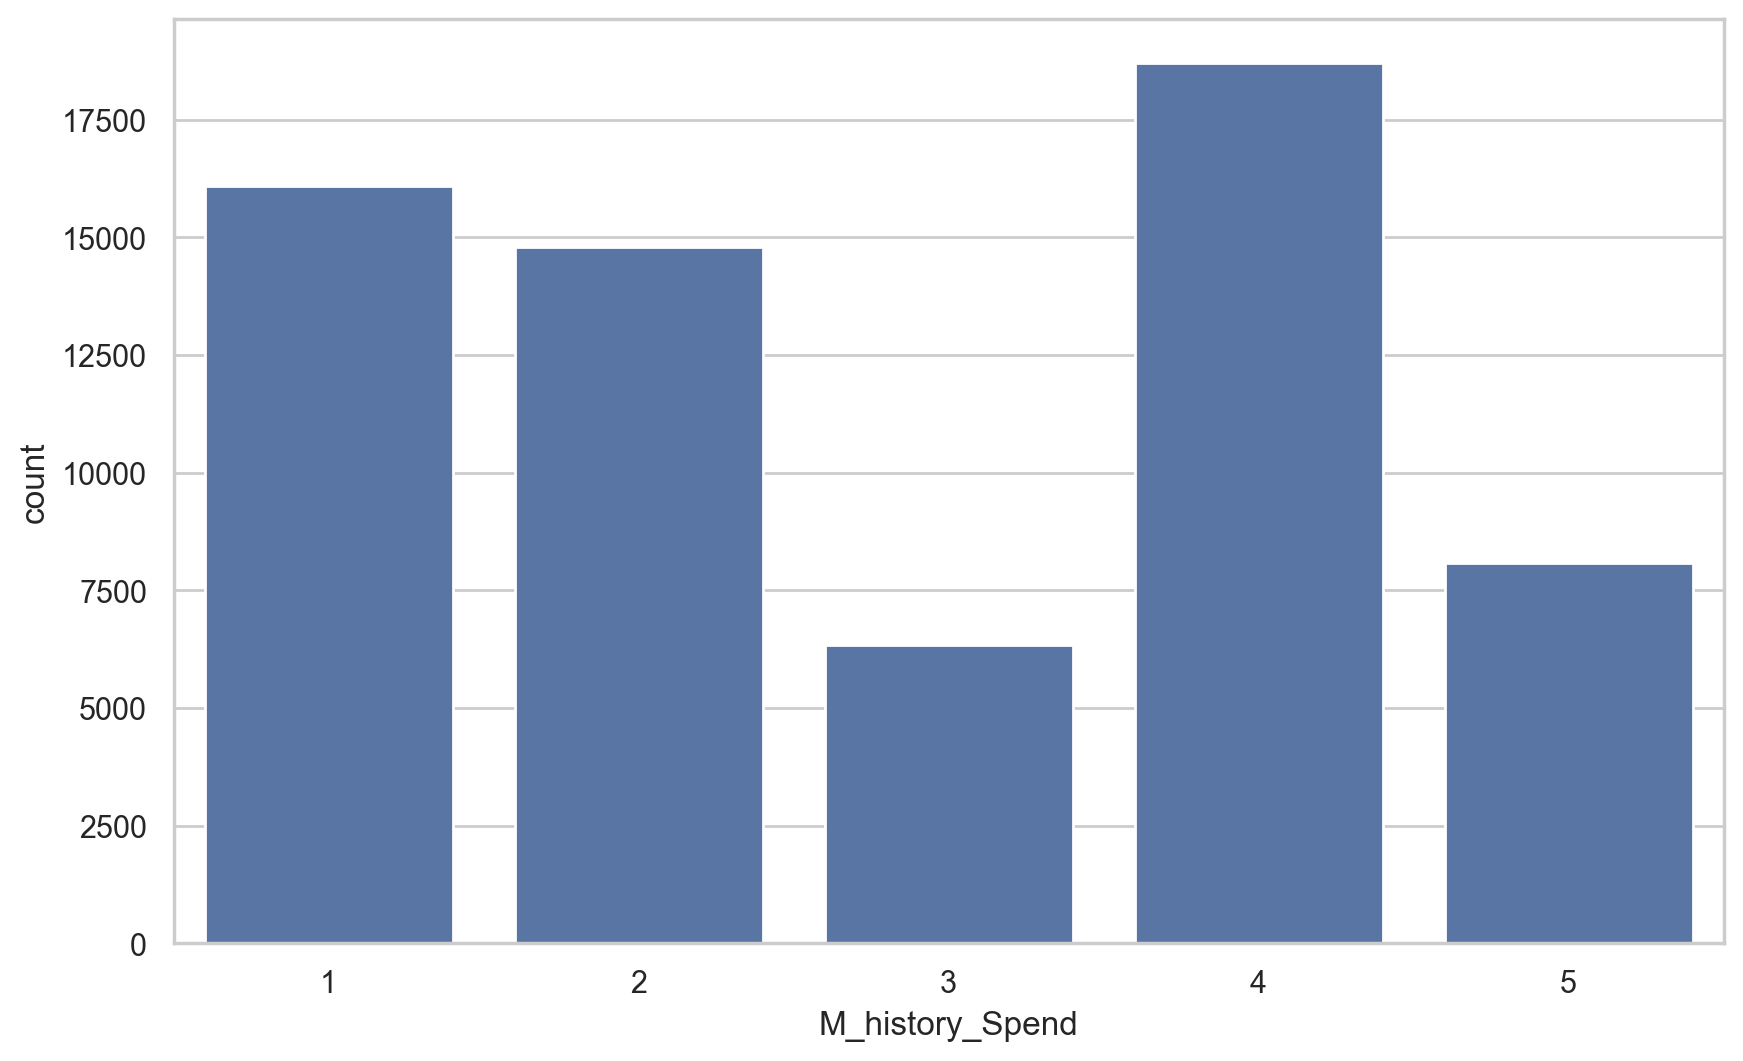

In [52]:
bin_edge = [0, 65, 150, 200, 500, 4000]
df['M_history_Spend'] = pd.cut(df['history'], bins=bin_edge, labels=[1, 2, 3, 4, 5], duplicates='drop')
df['M_history_Spend'].value_counts()
df['M_history_Spend'].count()
df.head(20)


sorted_m_values_1 = sorted(df['M_history_Spend'])
plt.figure(figsize=(10, 6))
sns.countplot(x='M_history_Spend', data=df,  order = sorted_m_values_1)
plt.show()

# Engagement (visit)

In [53]:
# Assign Frequency scores based on visit (5 for visit, 1 for no visit) 

df['F_frequency_visit'] = df['visit'].apply(lambda x: 5 if x == 1 else 1)
df.head()

,recency,history_segment,history,mens,womens,zip_code,newbie,channel,segment,visit,conversion,spend,Purchase_Ind,history_segment_ind,R_recency,M_history_Spend,F_frequency_visit
0,10,2) $100 - $200,142.44,1,0,Surburban,0,Phone,Womens E-Mail,0,0,0.0,1,2,2,2,1
1,6,3) $200 - $350,329.08,1,1,Rural,1,Web,No E-Mail,0,0,0.0,2,3,3,4,1
2,7,2) $100 - $200,180.65,0,1,Surburban,1,Web,Womens E-Mail,0,0,0.0,1,2,2,3,1
3,9,5) $500 - $750,675.83,1,0,Rural,1,Web,Mens E-Mail,0,0,0.0,1,5,2,5,1
4,2,1) $0 - $100,45.34,1,0,Urban,0,Web,Womens E-Mail,0,0,0.0,1,1,4,1,1


In [54]:
# Combining RFM Scores into a single score for segmentation 

df['RFM_score'] = df['R_recency'].astype(int) + df['M_history_Spend'].astype(int)  + df['F_frequency_visit'].astype(int) 
df[['R_recency', 'M_history_Spend', 'F_frequency_visit', 'RFM_score']]


,R_recency,M_history_Spend,F_frequency_visit,RFM_score
0,2,2,1,5
1,3,4,1,8
2,2,3,1,6
3,2,5,1,8
4,4,1,1,6
...,...,...,...,...
63995,2,2,1,5
63996,3,1,1,5
63997,3,1,1,5
63998,5,5,1,11


count    64000.000000
mean         7.368109
std          2.596372
min          3.000000
25%          5.000000
50%          7.000000
75%          9.000000
max         15.000000
Name: RFM_score, dtype: float64

(array([ 8972.,  8658.,  8344., 10097.,  8061., 12100.,  3573.,  1386.,
         1273.,  1536.]),
 array([ 3. ,  4.2,  5.4,  6.6,  7.8,  9. , 10.2, 11.4, 12.6, 13.8, 15. ]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'RFM_score')

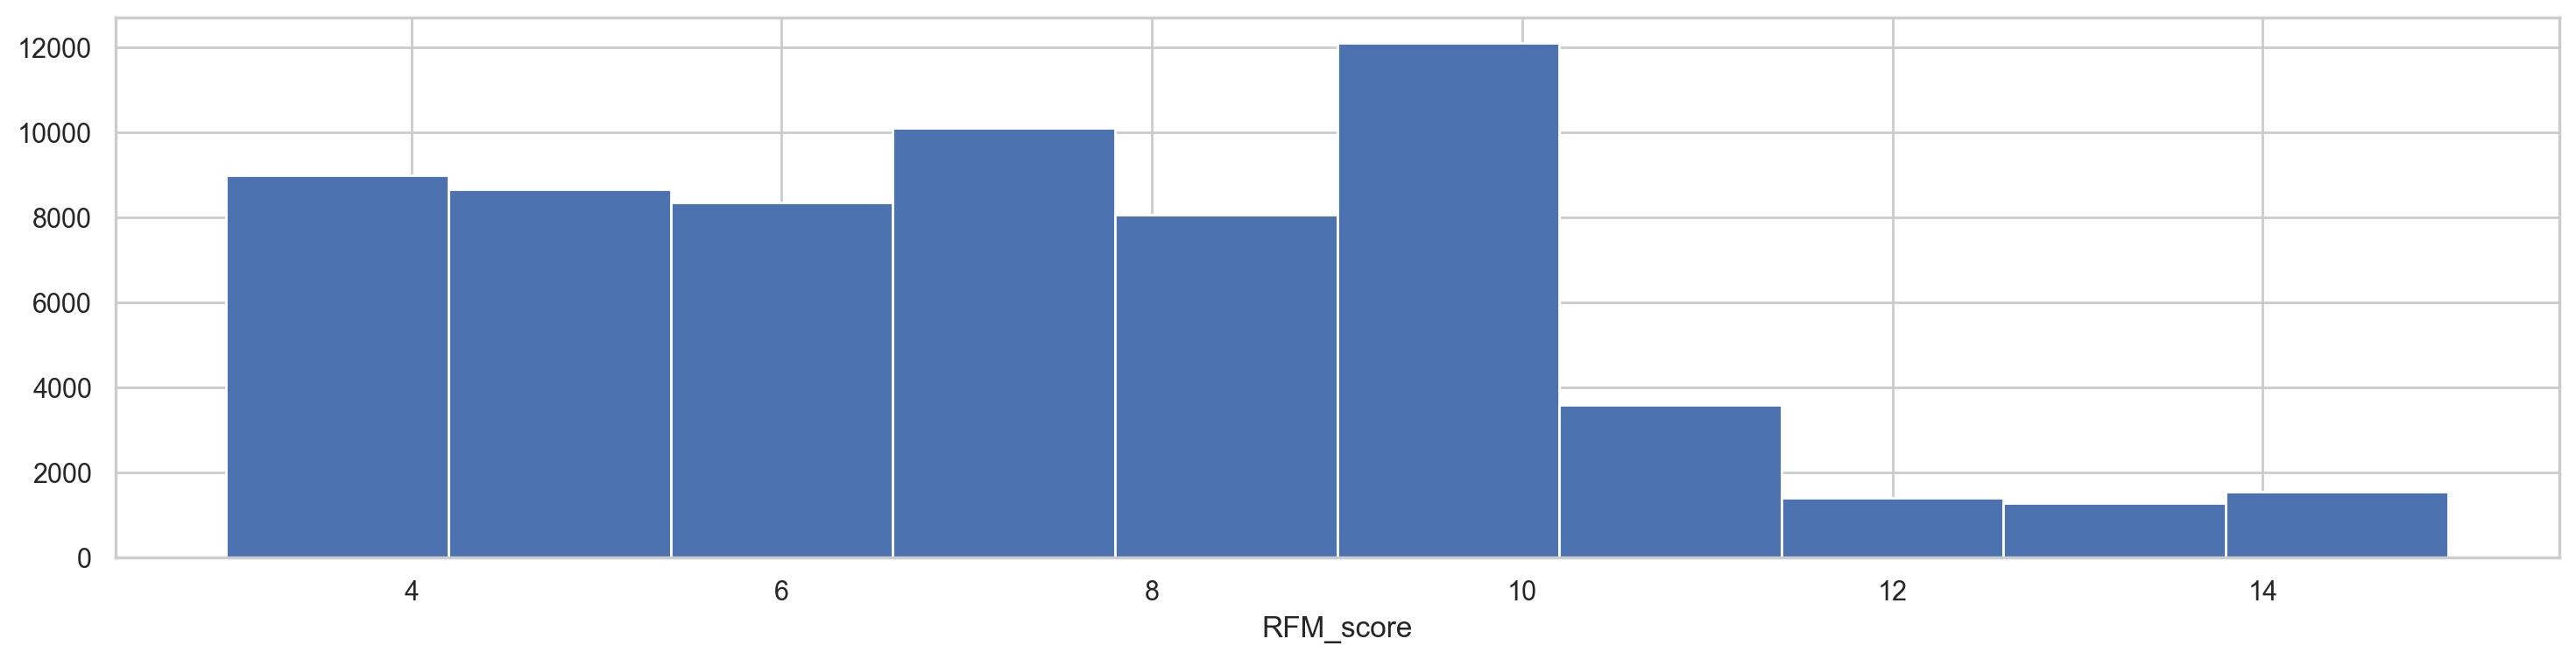

In [55]:
df['RFM_score'].describe()
plt.hist(df['RFM_score'])
plt.xlabel('RFM_score')
plt.show()


In [56]:
rfm_dist = df['RFM_score'].value_counts().sort_values(ascending=True).to_frame()
rfm_dist_normalized =df['RFM_score'].value_counts(normalize=True).sort_values(ascending=True).to_frame()
rfm_df = rfm_dist.merge(rfm_dist_normalized, left_index=True, right_index=True)
rfm_df.sort_index(ascending=False)

,count,proportion
RFM_score,,
15,461,0.007203
14,1075,0.016797
13,1273,0.019891
12,1386,0.021656
11,3573,0.055828
10,5558,0.086844
9,6542,0.102219
8,8061,0.125953
7,10097,0.157766


In [57]:
df['RFM_score'].count()

64000